# EDA for FOMC Meeting Minutes
And testing out spaCy

### Goal
Test out and create a pipeline for the creation of a model for parsing FOMC minutes and creating predictions

In [139]:
import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
import glob

from collections import Counter, defaultdict

import pandas as pd
from pandas_datareader import data
from matplotlib.dates import DateFormatter, WeekdayLocator, DayLocator, MONDAY
from matplotlib.finance import candlestick_ohlc
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.linear_model import LogisticRegression as LR

from FOMC import FOMC
from yahoo_finance import Currency, Share
from spacy.en import English
import pickle
import datetime as dt
from __future__ import print_function
from pprint import pprint

Populating the interactive namespace from numpy and matplotlib


In [116]:
# fomc = FOMC()
# df = fomc.get_statements()

Getting links...
There are 167 statements
.Getting articles - Multi-threaded............
.............................................................................................................................................................

In [6]:
# fomc.pick_df('../data/minutes_df.pickle')

Writing to ../data/minutes_df.pickle


In [136]:
with open(r'../data/minutes_df.pickle', 'rb') as f:
    minutes_df = pickle.load(f)

In [117]:
print(minutes_df.index[70])

2005-12-13 00:00:00


In [5]:
print(minutes_df.ix['2017-03-15'][0])

The Federal Reserve, the central bank of the United States, provides the nation with a safe, flexible, and stable monetary and financial system.

Federal Open Market Committee

Policy Implementation

Reports

Institution Supervision

Reporting Forms

Supervision & Regulation Letters

Banking Applications & Legal Developments

Regulatory Resources

Banking & Data Structure

Regulations & Statutes

Payment Policies

Reserve Bank Payment Services & Data

Financial Market Utilities & Infrastructures

Research, Committees, and Forums

Working Papers and Notes

Models and Tools

Bank Assets and Liabilities

Bank Structure Data

Business Finance

Dealer Financing Terms

Exchange Rates and International Data

Financial Accounts

Household Finance

Industrial Activity

Interest Rates

Money Stock and Reserve Balances

Regulations

Supervision & Enforcement

Community Development

Research & Analysis

Consumer Resources

February 01, 2017

For release at 2:00 p.m. EST                     
      

In [7]:
nlp = English()
doc = nlp(unicode(minutes_df.ix['2017-03-15'][0]))
doc.__class__

spacy.tokens.doc.Doc

In [8]:
doc.sents

In [9]:
for sent in doc.sents:
    print('new: ', sent)

new:  The Federal Reserve, the central bank of the United States, provides the nation with a safe, flexible, and stable monetary and financial system.


new:  Federal Open Market Committee


new:  Policy Implementation

Reports

Institution Supervision

Reporting Forms

Supervision & Regulation Letters

Banking Applications & Legal Developments

Regulatory Resources

Banking & Data Structure

Regulations & Statutes

Payment Policies

Reserve Bank Payment Services & Data

Financial Market Utilities & Infrastructures

Research, Committees, and Forums

Working Papers and Notes

Models and Tools

Bank Assets and Liabilities

Bank Structure Data

Business Finance

Dealer Financing Terms

Exchange Rates and International Data

Financial Accounts

Household Finance


new:  Industrial Activity

Interest Rates

Money Stock and Reserve Balances

Regulations

Supervision & Enforcement

Community Development

Research & Analysis

Consumer Resources

February 01, 2017


new:  For release at 2:00 p.

In [10]:
VXX = Share('VXX')  # Volatility
float(VXX.get_price()) - float(VXX.get_prev_close())

-0.3299999999999983

In [11]:
VXX_historical = VXX.get_historical('2009-01-01', '2010-12-31')

In [12]:
VXX_historical[0]

{'Adj_Close': '2407.040039',
 'Close': '37.610001',
 'Date': '2010-12-31',
 'High': '38.43',
 'Low': '37.52',
 'Open': '38.099998',
 'Symbol': 'VXX',
 'Volume': '91800'}

In [13]:
str(dt.date.today())

'2017-03-28'

In [14]:
# We will look at stock prices over the past year, starting at January 1, 2016
start = dt.datetime(2014,1,1)
end = dt.date.today()
 
# Let's get Apple stock data; Apple's ticker symbol is AAPL
# First argument is the series we want, second is the source ("yahoo" for Yahoo! Finance), third is the start date, fourth is the end date
apple = data.DataReader("AAPL", "yahoo", start, end)
 
type(apple)

pandas.core.frame.DataFrame

In [15]:
apple

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,555.680008,557.029999,552.020004,553.129990,58671200,74.115916
2014-01-03,552.860023,553.699989,540.429993,540.980019,98116900,72.487897
2014-01-06,537.450005,546.800018,533.599983,543.929993,103152700,72.883175
2014-01-07,544.320015,545.959999,537.919975,540.040024,79302300,72.361944
2014-01-08,538.809982,545.559990,538.689980,543.460022,64632400,72.820202
2014-01-09,546.800018,546.859993,535.349983,536.519997,69787200,71.890282
2014-01-10,539.829979,540.799988,531.109993,532.939995,76244000,71.410585
2014-01-13,529.910019,542.500000,529.880005,535.730019,94623200,71.784430
2014-01-14,538.220009,546.730003,537.659996,546.390022,83140400,73.212803


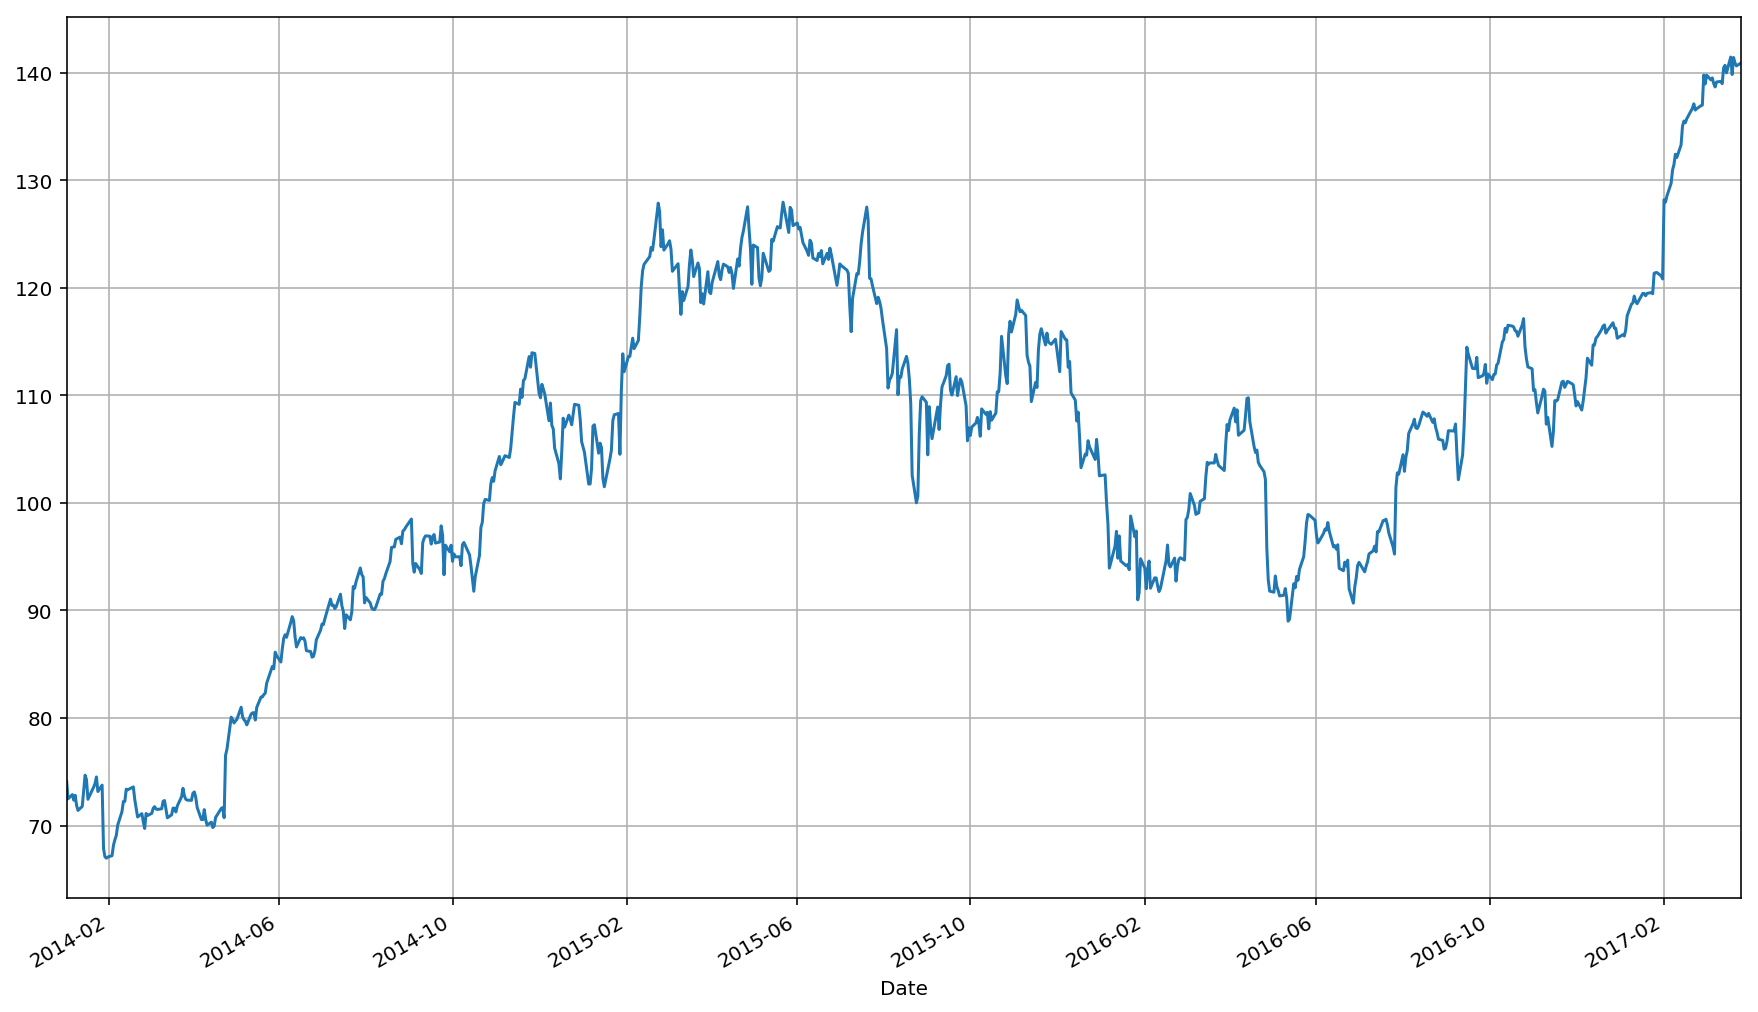

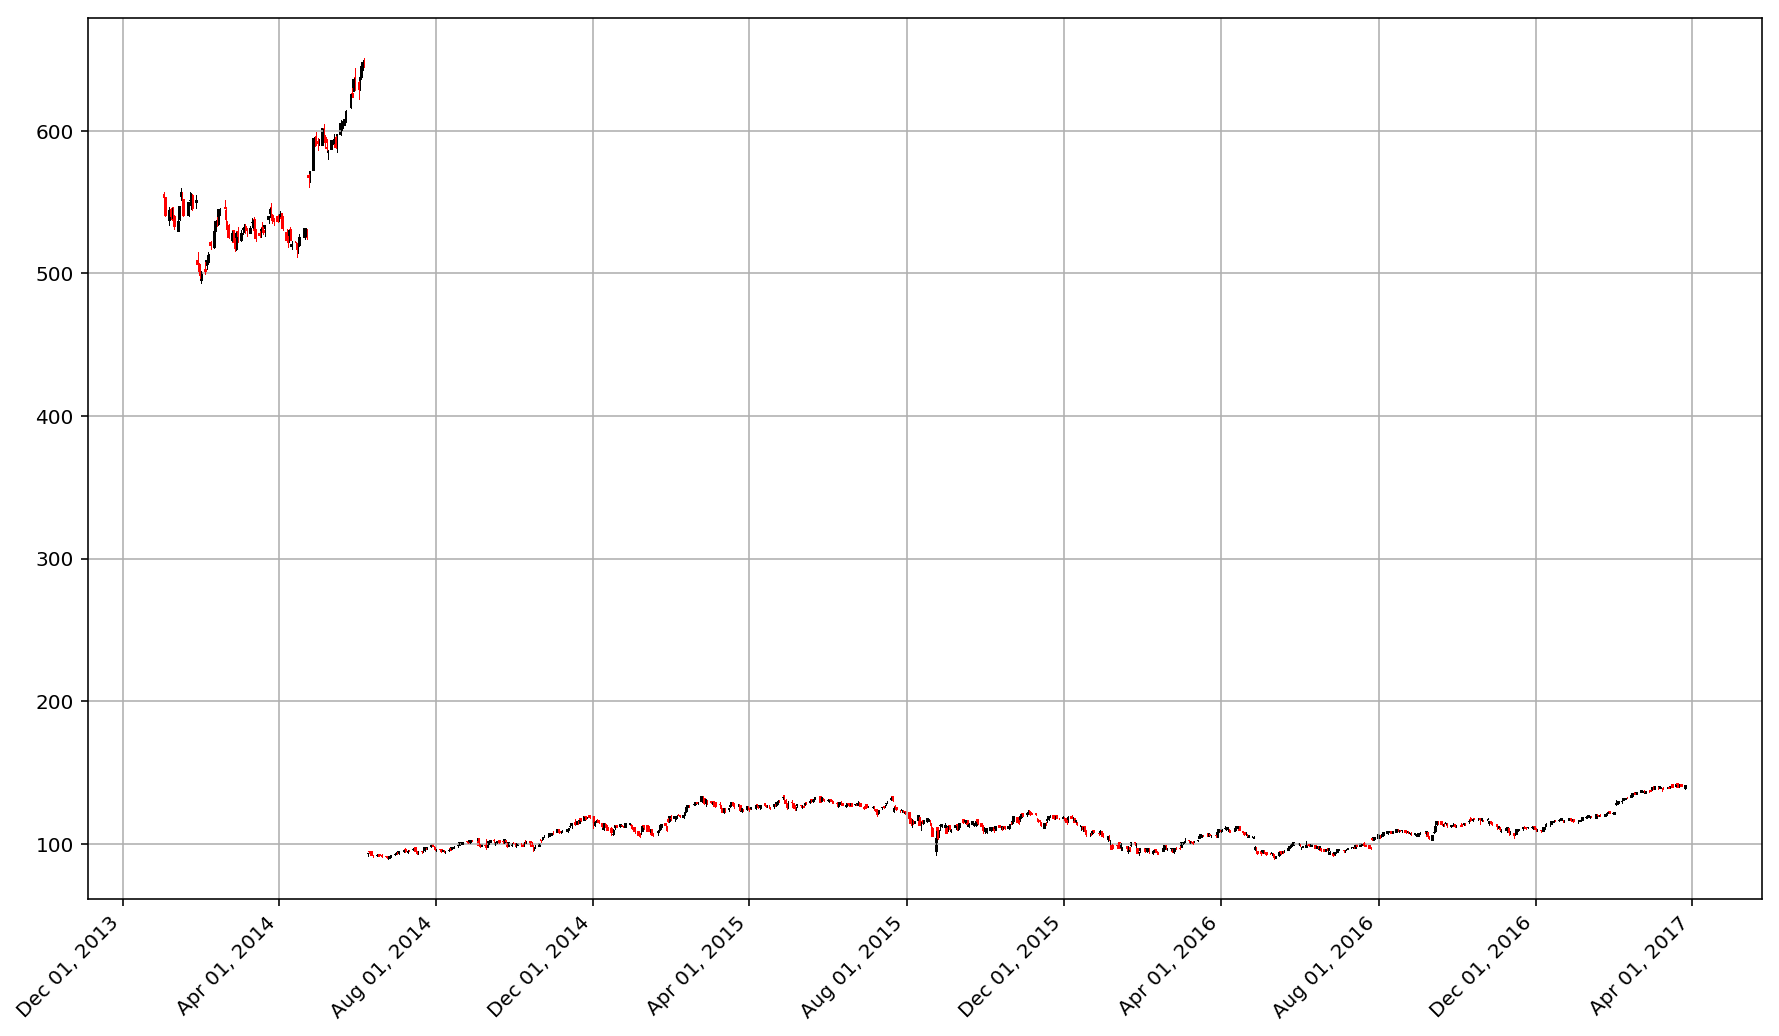

In [16]:
def pandas_candlestick_ohlc(dat, stick = "day", otherseries = None):
    """
    :param dat: pandas DataFrame object with datetime64 index, and float columns "Open", "High", "Low", and "Close", likely created via DataReader from "yahoo"
    :param stick: A string or number indicating the period of time covered by a single candlestick. Valid string inputs include "day", "week", "month", and "year", ("day" default), and any numeric input indicates the number of trading days included in a period
    :param otherseries: An iterable that will be coerced into a list, containing the columns of dat that hold other series to be plotted as lines
 
    This will show a Japanese candlestick plot for stock data stored in dat, also plotting other series if passed.
    """
    mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
    alldays = DayLocator()              # minor ticks on the days
    dayFormatter = DateFormatter('%d')      # e.g., 12
 
    # Create a new DataFrame which includes OHLC data for each period specified by stick input
    transdat = dat.loc[:,["Open", "High", "Low", "Close"]]
    if (type(stick) == str):
        if stick == "day":
            plotdat = transdat
            stick = 1 # Used for plotting
        elif stick in ["week", "month", "year"]:
            if stick == "week":
                transdat["week"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[1]) # Identify weeks
            elif stick == "month":
                transdat["month"] = pd.to_datetime(transdat.index).map(lambda x: x.month) # Identify months
            transdat["year"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[0]) # Identify years
            grouped = transdat.groupby(list(set(["year",stick]))) # Group by year and other appropriate variable
            plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
            for name, group in grouped:
                plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                            "High": max(group.High),
                                            "Low": min(group.Low),
                                            "Close": group.iloc[-1,3]},
                                           index = [group.index[0]]))
            if stick == "week": stick = 5
            elif stick == "month": stick = 30
            elif stick == "year": stick = 365
 
    elif (type(stick) == int and stick >= 1):
        transdat["stick"] = [np.floor(i / stick) for i in range(len(transdat.index))]
        grouped = transdat.groupby("stick")
        plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
        for name, group in grouped:
            plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                        "High": max(group.High),
                                        "Low": min(group.Low),
                                        "Close": group.iloc[-1,3]},
                                       index = [group.index[0]]))
 
    else:
        raise ValueError('Valid inputs to argument "stick" include the strings "day", "week", "month", "year", or a positive integer')
 
 
    # Set plot parameters, including the axis object ax used for plotting
    fig, ax = plt.subplots()
    fig.subplots_adjust(bottom=0.2)
    if plotdat.index[-1] - plotdat.index[0] < pd.Timedelta('730 days'):
        weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
        ax.xaxis.set_major_locator(mondays)
        ax.xaxis.set_minor_locator(alldays)
    else:
        weekFormatter = DateFormatter('%b %d, %Y')
    ax.xaxis.set_major_formatter(weekFormatter)
 
    ax.grid(True)
 
    # Create the candelstick chart
    candlestick_ohlc(ax, list(zip(list(date2num(plotdat.index.tolist())), plotdat["Open"].tolist(), plotdat["High"].tolist(),
                      plotdat["Low"].tolist(), plotdat["Close"].tolist())),
                      colorup = "black", colordown = "red", width = stick * .4)
 
    # Plot other series (such as moving averages) as lines
    if otherseries != None:
        if type(otherseries) != list:
            otherseries = [otherseries]
        dat.loc[:,otherseries].plot(ax = ax, lw = 1.3, grid = True)
 
    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
 
    plt.show()
 
apple["Adj Close"].plot(grid = True) # Plot the adjusted closing price of AAPL
pandas_candlestick_ohlc(apple)

In [17]:
doc = nlp(unicode("Apples and oranges are similar. Boots and hippos aren't."))

apples = doc[0]
oranges = doc[2]
boots = doc[6]
hippos = doc[8]

In [18]:
apples.similarity(oranges)

0.39289959293092641

In [19]:
import spacy
nlp = spacy.load('en')
doc = nlp(u'They told us to duck.')
for word in doc:
    print(word.text, word.lemma, word.lemma_, word.tag, word.tag_, word.pos, word.pos_)

They 500 they 445 PRP 92 PRON
told 750 tell 455 VBD 97 VERB
us 694 us 445 PRP 92 PRON
to 468 to 452 TO 91 PART
duck 5792 duck 454 VB 97 VERB
. 419 . 419 . 94 PUNCT


In [20]:
def find_person_occurences(processed_text):
    """
    Return a list of actors from `doc` with corresponding occurences.
    
    :param doc: Spacy NLP parsed document
    :return: list of tuples in form
        [('elizabeth', 622), ('darcy', 312), ('jane', 286), ('bennet', 266)]
    """
    
    characters = Counter()
    for ent in processed_text.ents:
        if ent.label_ == 'PERSON':
            characters[ent.lemma_] += 1
            
    return characters.most_common()

def find_place_occurences(processed_text):
    characters = Counter()
    for ent in processed_text.ents:
        if ent.label_ == 'GPE':
            characters[ent.lemma_] += 1
    return characters.most_common()

def find_rate_occurences(processed_text):
    characters = Counter()
    for ent in processed_text.ents:
        if ent.label_ in ['CARDINAL','PERCENT']:
            characters[ent.lemma_] += 1
    return characters.most_common()

def find_date_occurences(processed_text):
    characters = Counter()
    for ent in processed_text.ents:
        if ent.label_ == 'DATE':
            characters[ent.lemma_] += 1
    return characters.most_common()

def find_org_occurences(processed_text):
    characters = Counter()
    for ent in processed_text.ents:
        if ent.label_ == 'ORG':
            characters[ent.lemma_] += 1
    return characters.most_common()

def find_occurences(processed_text, list_):
    characters = Counter()
    for ent in processed_text.ents:
        if ent.label_ in list_:
            characters[ent.lemma_] += 1
    return characters.most_common()

In [118]:
find_occurences(doc, ['MONEY','ORG'])

[]

In [119]:
for ent in doc.ents:
    print(ent.lemma_, ent.label_)

one CARDINAL
lady lucas PERSON
jane PERSON
bingley PERSON


In [137]:
doc = nlp(unicode(minutes_df.iloc[0,0]), )
find_person_occurences(doc)

[(u'greenspan', 1), (u'alan greenspan', 1)]

In [121]:
print(doc.text)

Chairman Alan Greenspan announced today that the Federal Open Market Committee decided to increase slightly the degree of pressure on reserve positions. The action is expected to be associated with a small increase in short-term money market interest rates.

The decision was taken to move toward a less accommodative stance in monetary policy in order to sustain and enhance the economic expansion.

Chairman Greenspan decided to announce this action immediately so as to avoid any misunderstanding of the Committee's purposes, given the fact that this is the first firming of reserve market conditions by the Committee since early 1989.


In [122]:
list(doc.noun_chunks)

[Chairman Alan Greenspan,
 the Federal Open Market Committee,
 the degree,
 pressure,
 reserve positions,
 The action,
 a small increase,
 short-term money market interest rates,
 The decision,
 a less accommodative stance,
 monetary policy,
 order,
 the economic expansion,
 Chairman Greenspan,
 this action,
 any misunderstanding,
 the Committee's purposes,
 the fact,
 the first firming,
 reserve market conditions,
 the Committee]

In [123]:
# Process sentences 'Hello, world. Natural Language Processing in 10 lines of code.' using spaCy
doc = nlp(u'Hello, world. Natural Language Processing in 10 lines of code.')

# Get first token of the processed document
token = doc[0]
print(token)

# Print sentences (one sentence per line)
for sent in doc.sents:
    print(sent)
    
print()
# For each token, print corresponding part of speech tag
for token in doc:
    print('{} - {}'.format(token, token.pos_))

Hello
Hello, world.
Natural Language Processing in 10 lines of code.

Hello - INTJ
, - PUNCT
world - NOUN
. - PUNCT
Natural - PROPN
Language - PROPN
Processing - PROPN
in - ADP
10 - NUM
lines - NOUN
of - ADP
code - NOUN
. - PUNCT


In [124]:
doc1 = nlp(unicode(minutes_df.iloc[0,0]))
doc2 = nlp(unicode(minutes_df.iloc[1,0]))
doc99 = nlp(unicode(minutes_df.iloc[-1,0]))

In [125]:
doc1.similarity(doc99)

0.97478908778696716

In [126]:
word = nlp(unicode('marry'))[0]

In [127]:
doc = nlp(unicode("her mother was talking to that one person (Lady Lucas) freely, openly, and of nothing else but her expectation that Jane would soon be married to Mr. Bingley."))

In [128]:
VERB_LEMMA = "marry"
for ent in doc.ents:
    if ent.label_ == 'PERSON':
        print(ent.root.head.lemma_,'.')

person .
marry .
to .


# Price data for engineering the Y values

In [129]:
def plot_trend_data(ax, name, series):
    ax.plot(series.index, series)
    ax.set_title("{}".format(name))
def fit_moving_average_trend(series, window=6):
    return series.rolling(window=window,center=False).mean()
def plot_moving_average_trend(ax, name, series, window=6):
    moving_average_trend = fit_moving_average_trend(series, window)
    plot_trend_data(ax, name, series)
    ax.plot(series.index, moving_average_trend, color='green')

In [130]:
prices = dict()
col_names = ['date', 'open', 'high', 'low', 'close', 'volume', 'count', 'WAP']
for filename in glob.glob('../data/*.csv'):
    this_file = filename.split('/')[-1].split('.')[0]
    prices[this_file] = pd.read_csv(filename, parse_dates=['date'], infer_datetime_format=True,names=col_names).drop_duplicates()
    prices[this_file].set_index('date', inplace=True,)
    prices[this_file].index = prices[this_file].index.tz_localize('America/Los_Angeles').tz_convert('America/New_York').tz_localize(None)
    prices[this_file]['close-MA-4'] = fit_moving_average_trend(prices[this_file]['close'], 
                                                              window=4)

In [131]:
prices.keys()

['USD-CAD-MIDPOINT',
 'XLB-USD-TRADES',
 'EUR-USD-MIDPOINT',
 'SHY-USD-TRADES',
 'GDX-USD-TRADES',
 'XLE-USD-TRADES',
 'USD-JPY-MIDPOINT',
 'XLI-USD-TRADES',
 'XLF-USD-TRADES',
 'XLV-USD-TRADES',
 'SPY-OIV',
 'XLY-USD-TRADES',
 'XLU-USD-TRADES',
 'SPY-USD-TRADES',
 'XLK-USD-TRADES',
 'OIL-USD-TRADES']

### How many observations are there in each?

In [132]:
for key in prices.keys():
    print(len(prices[key]), "observations in {}".format(key))

149867 observations in USD-CAD-MIDPOINT
40827 observations in XLB-USD-TRADES
150001 observations in EUR-USD-MIDPOINT
40626 observations in SHY-USD-TRADES
35634 observations in GDX-USD-TRADES
40828 observations in XLE-USD-TRADES
150055 observations in USD-JPY-MIDPOINT
39785 observations in XLI-USD-TRADES
40832 observations in XLF-USD-TRADES
40823 observations in XLV-USD-TRADES
36760 observations in SPY-OIV
40822 observations in XLY-USD-TRADES
40262 observations in XLU-USD-TRADES
40830 observations in SPY-USD-TRADES
40826 observations in XLK-USD-TRADES
34578 observations in OIL-USD-TRADES


### Lets plot the prices to check for anomalies and outlies (usually misprints)

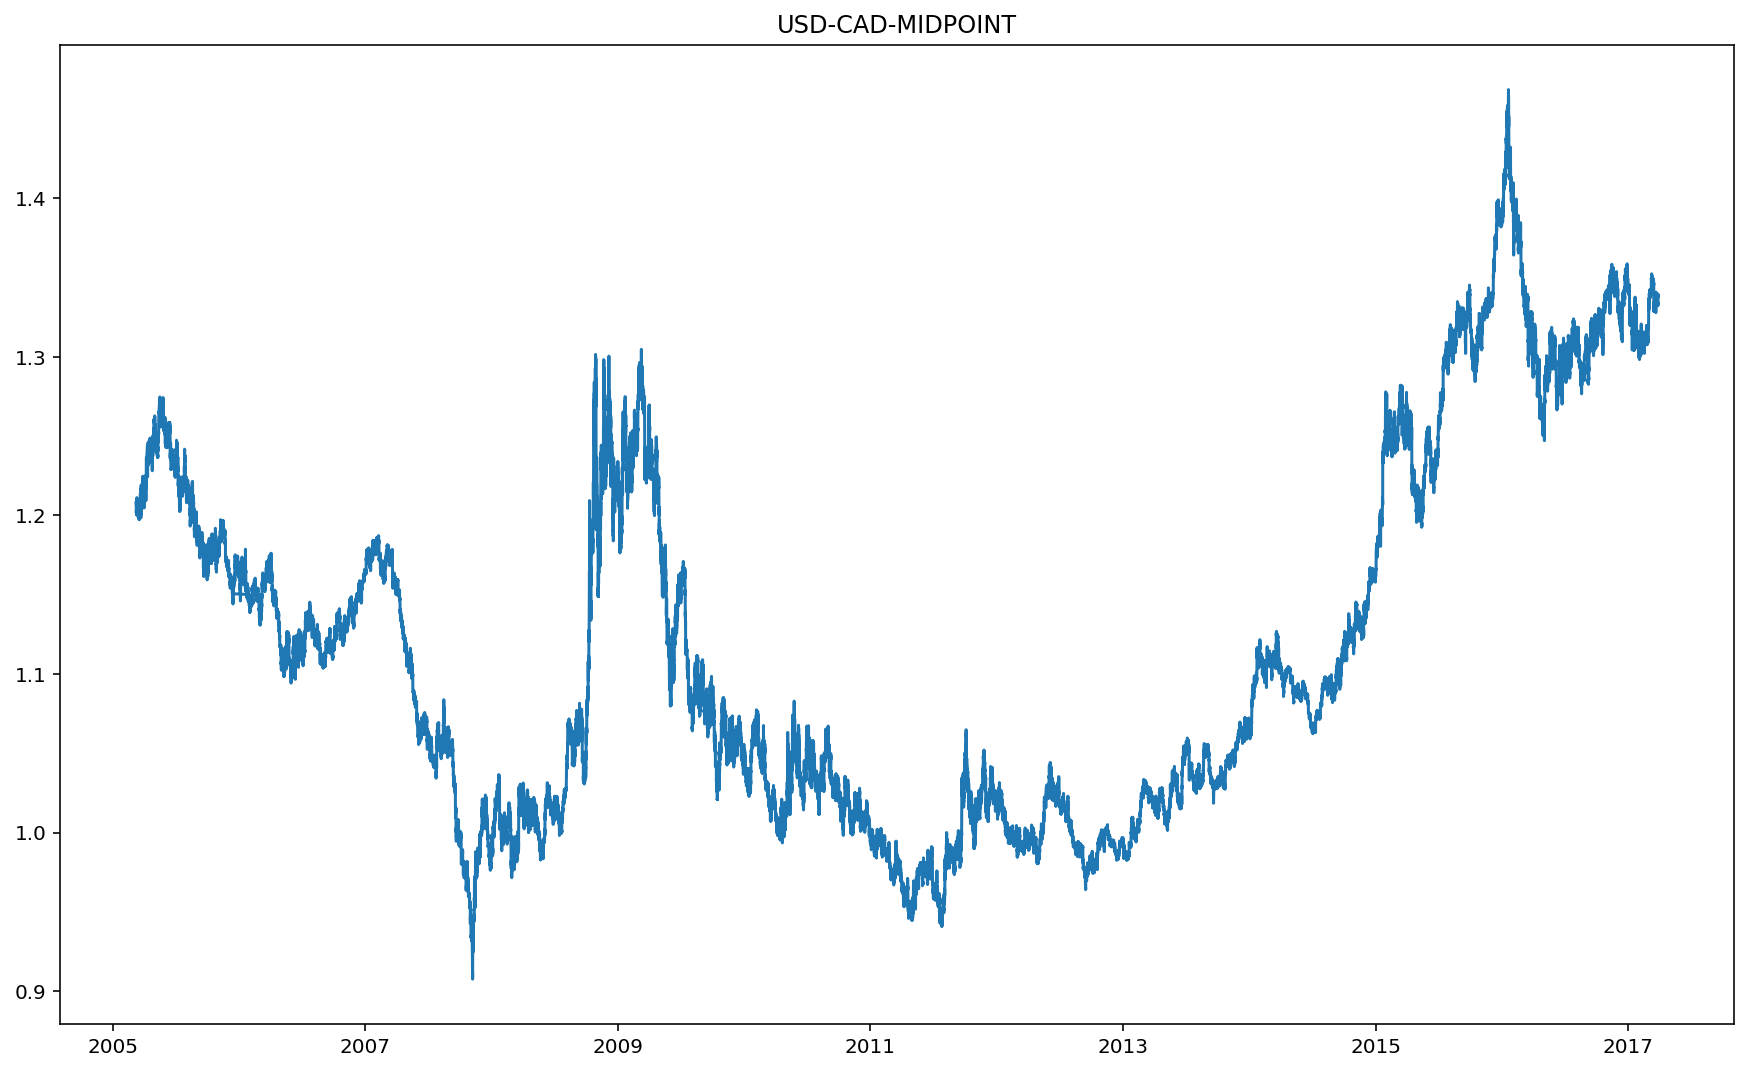

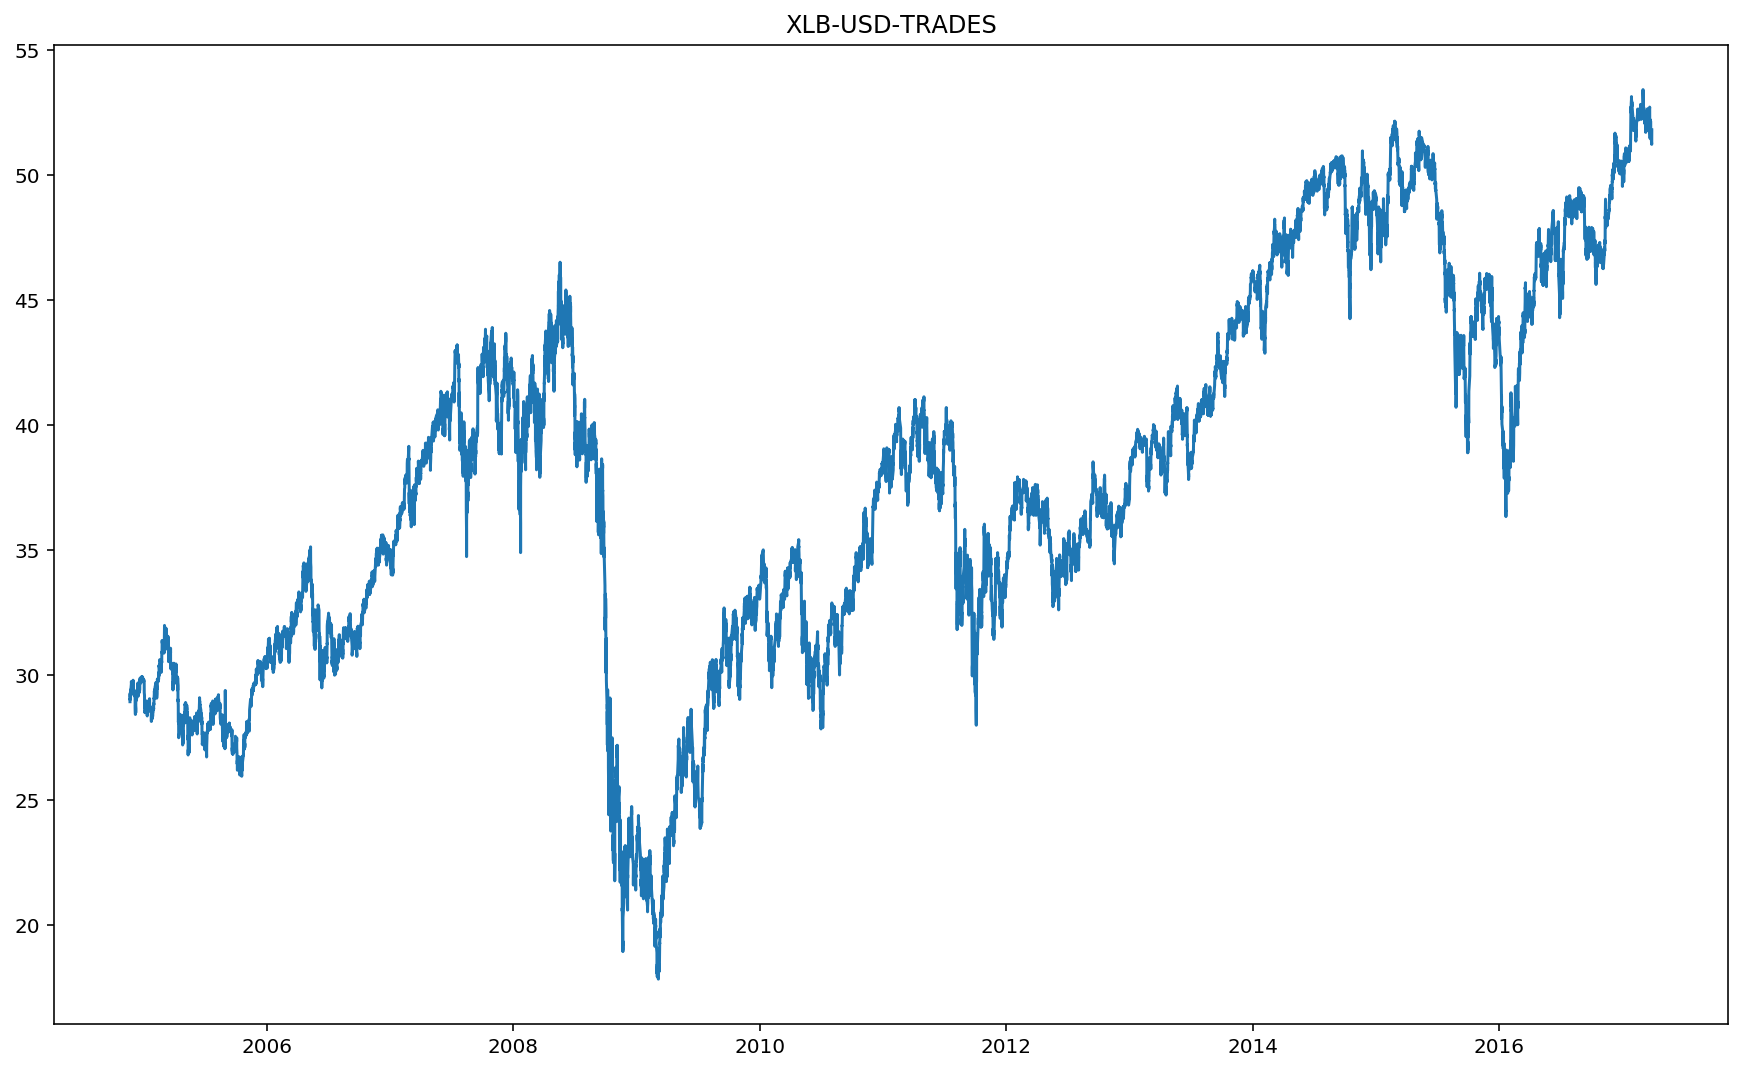

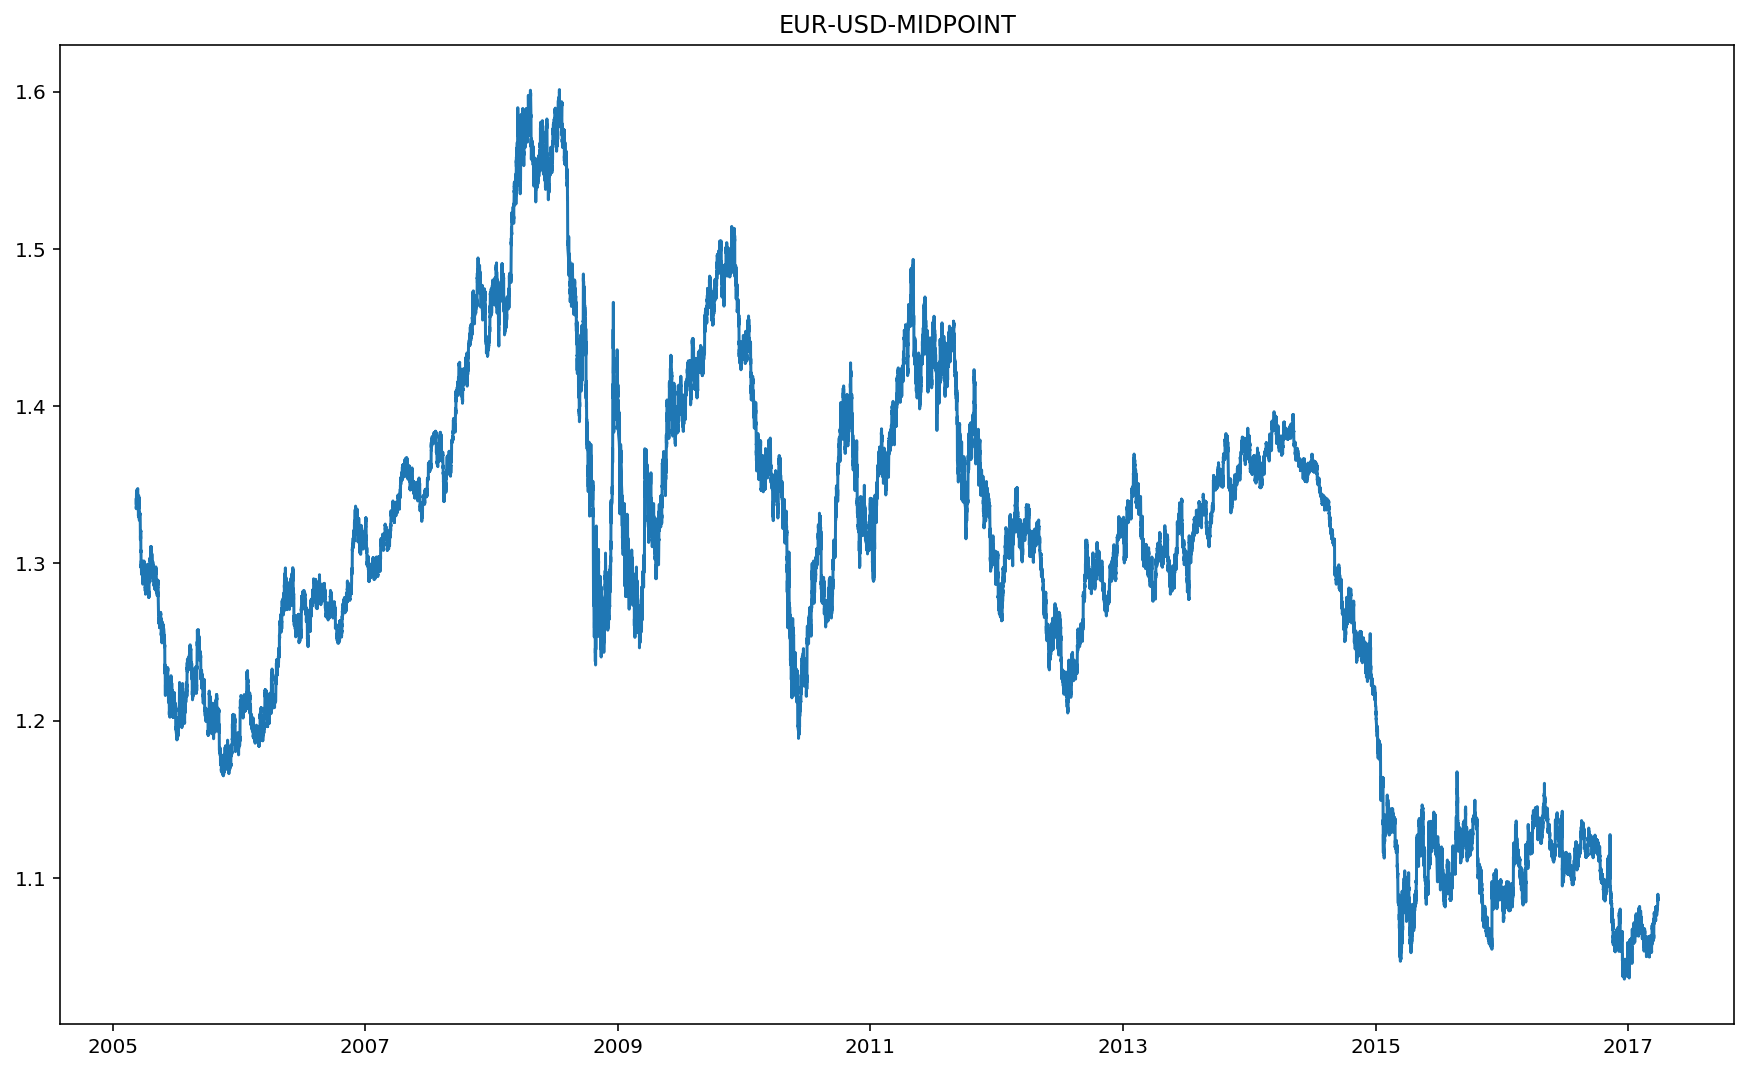

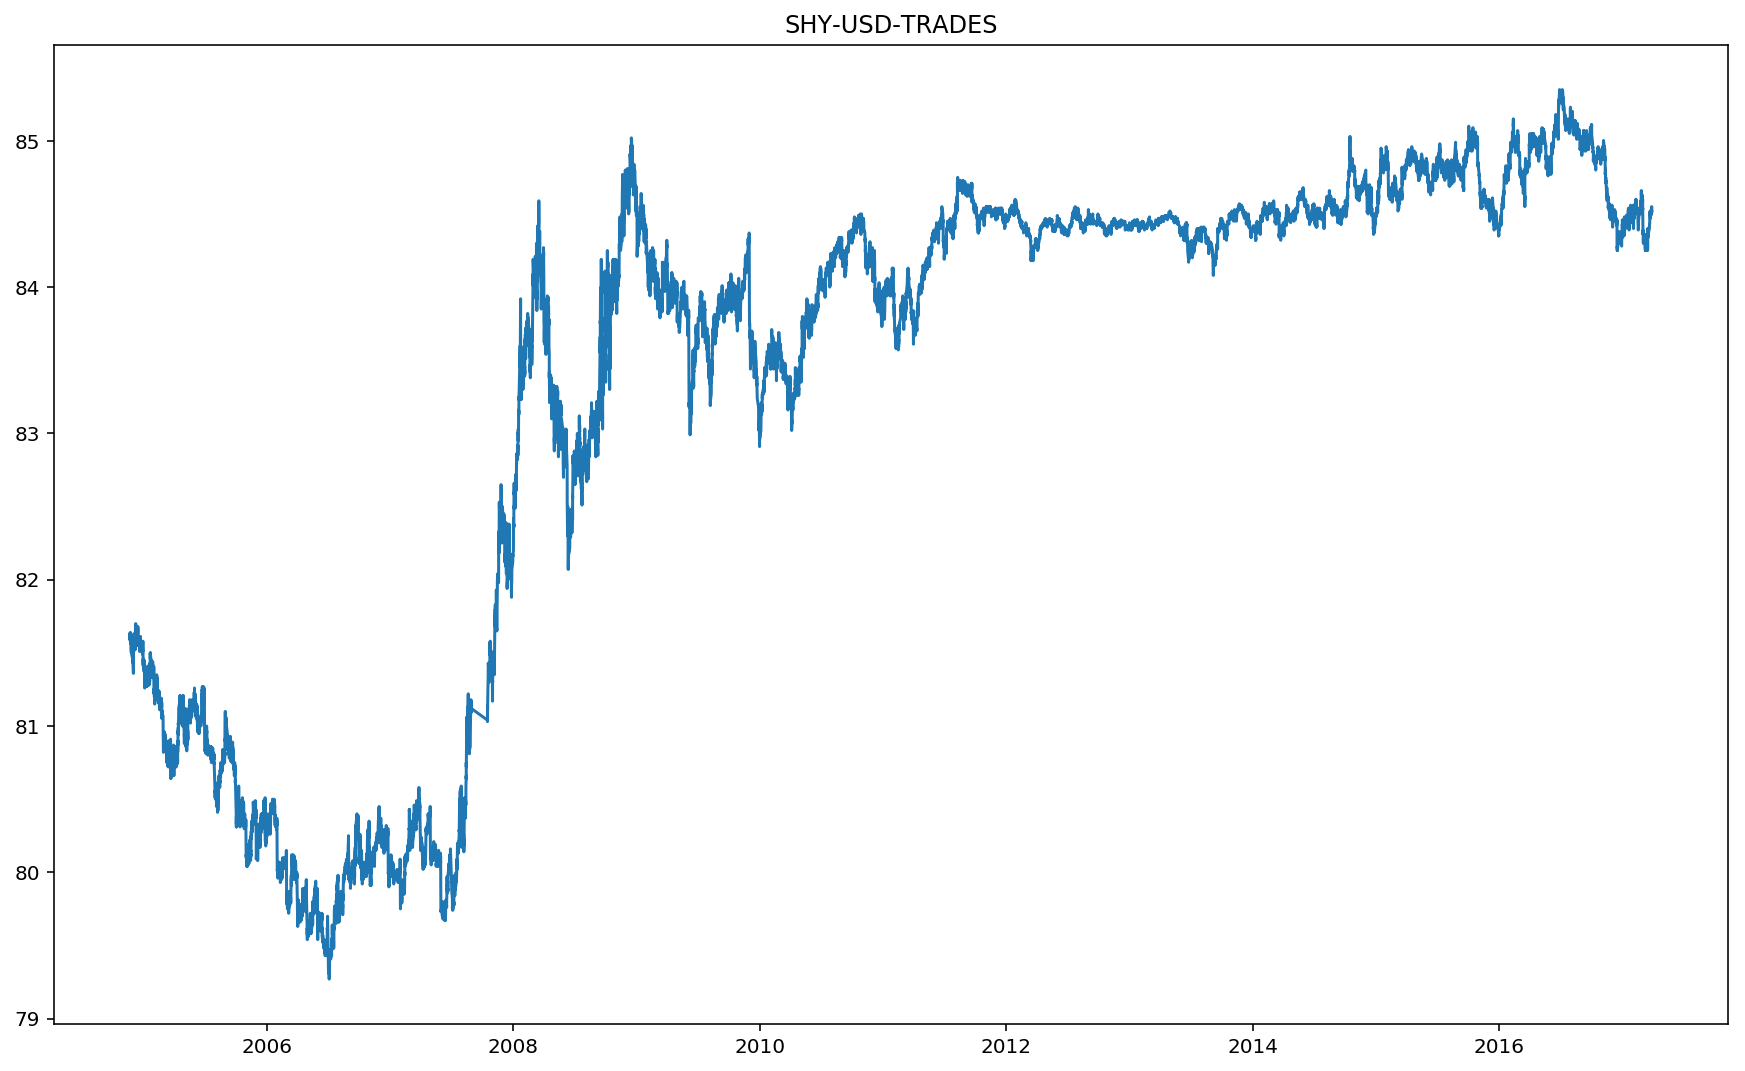

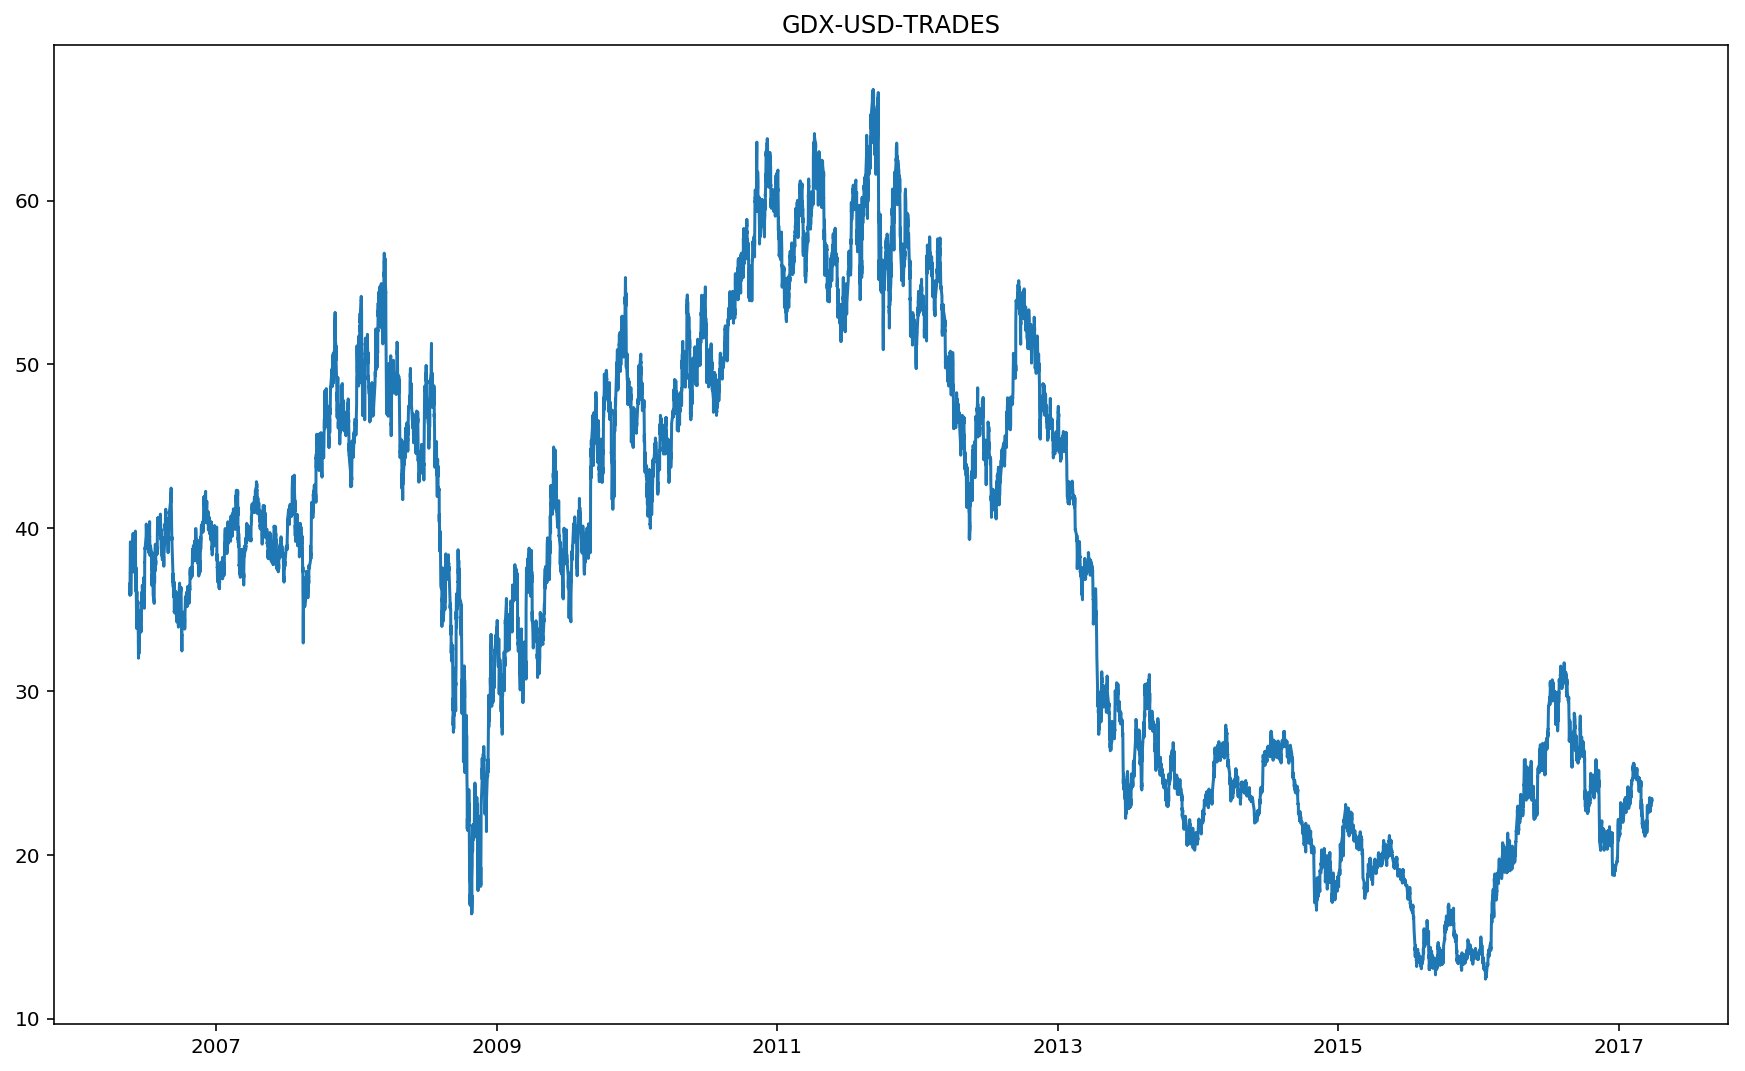

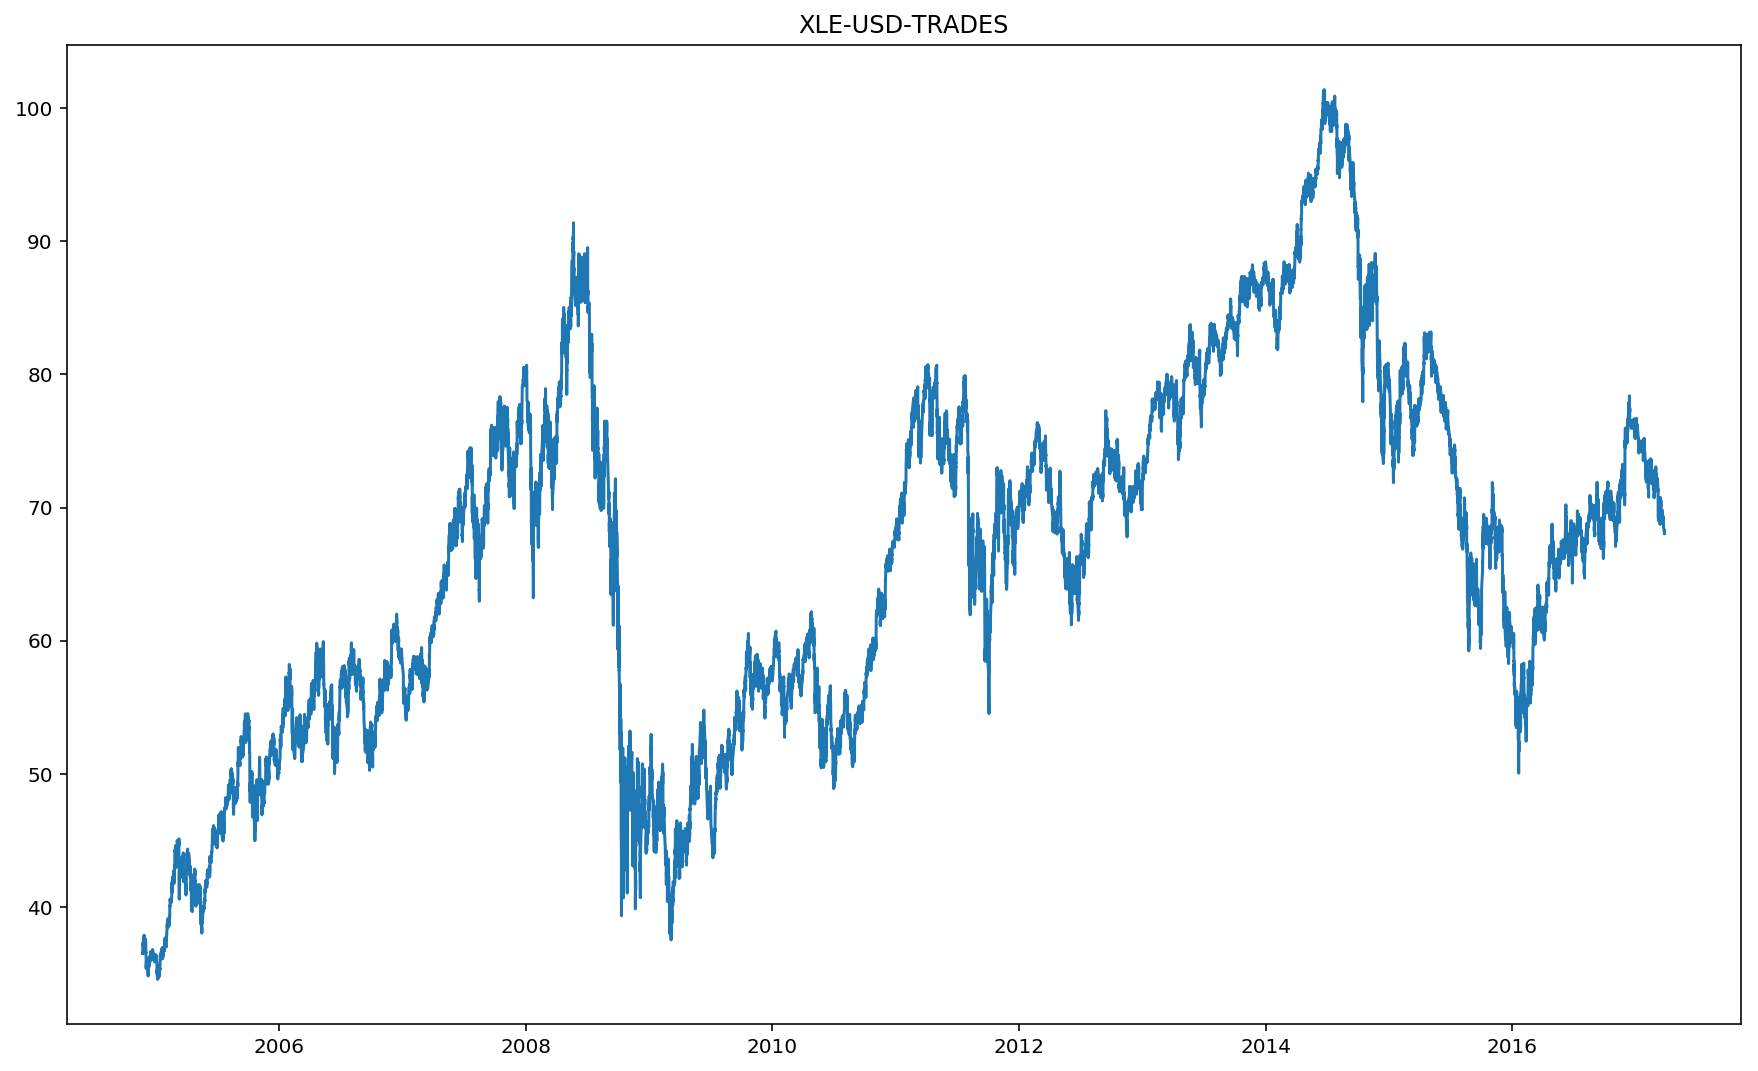

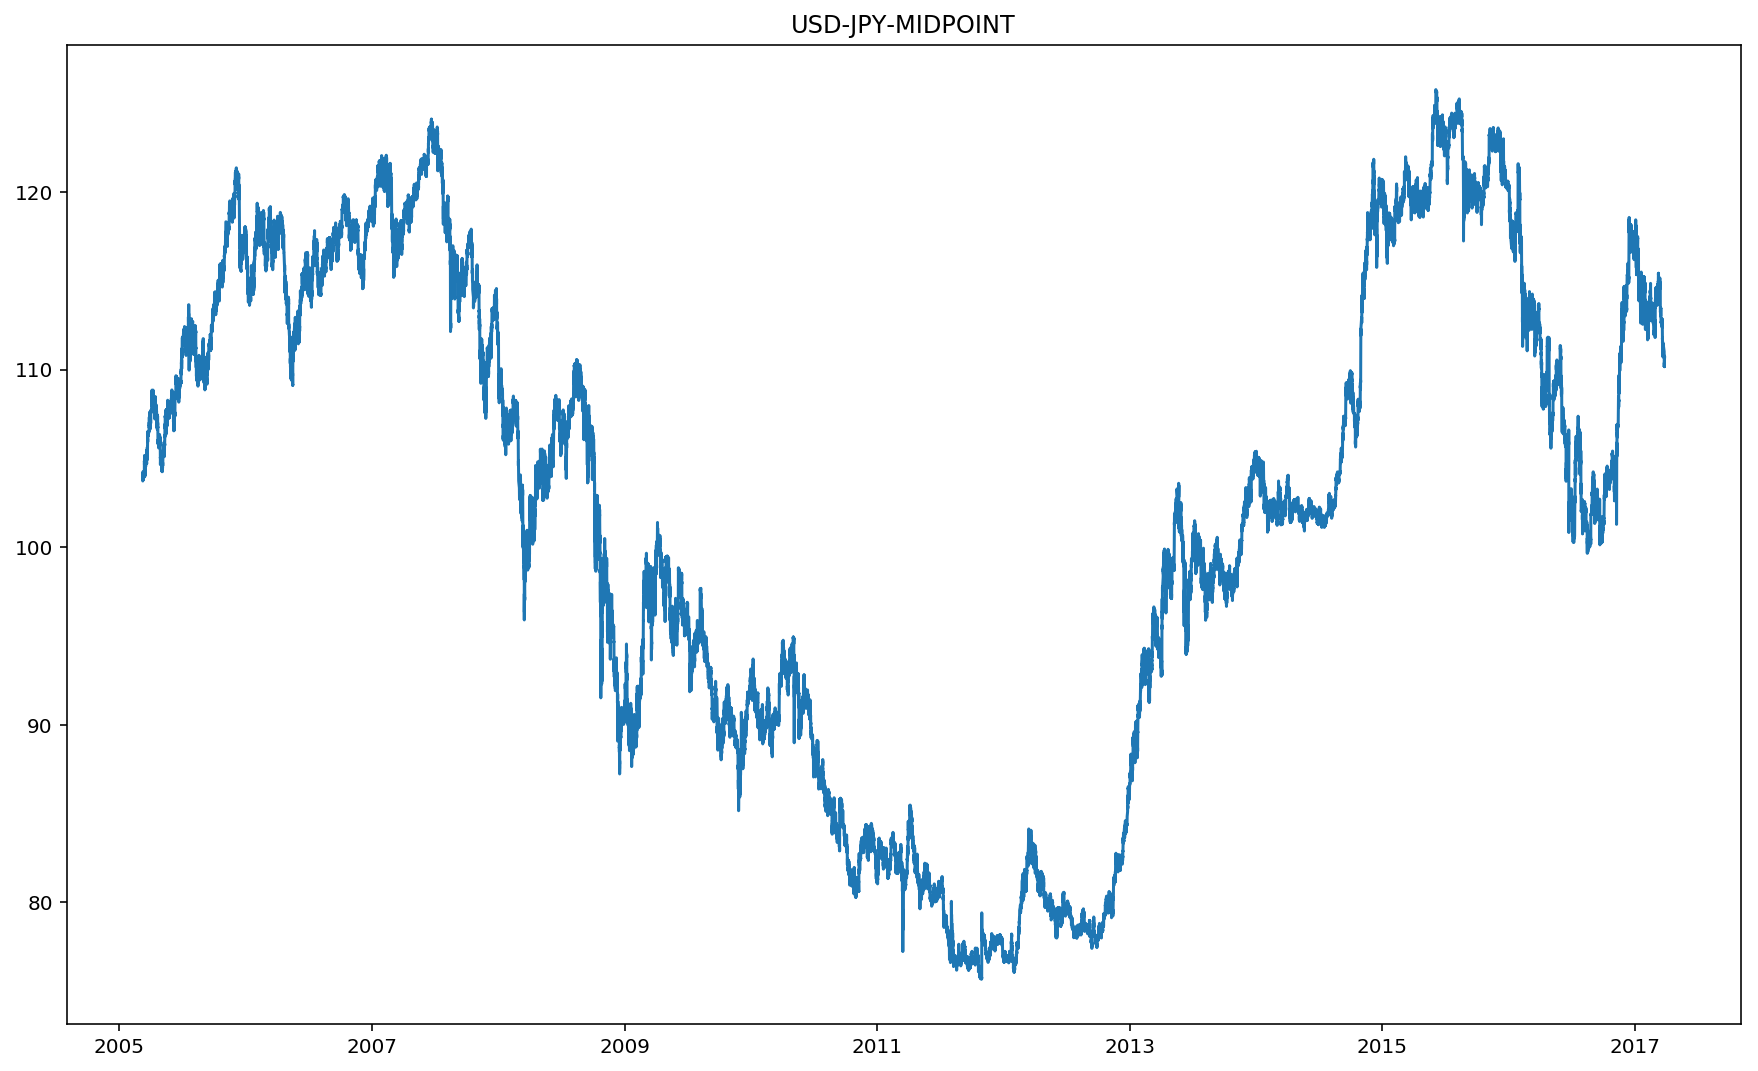

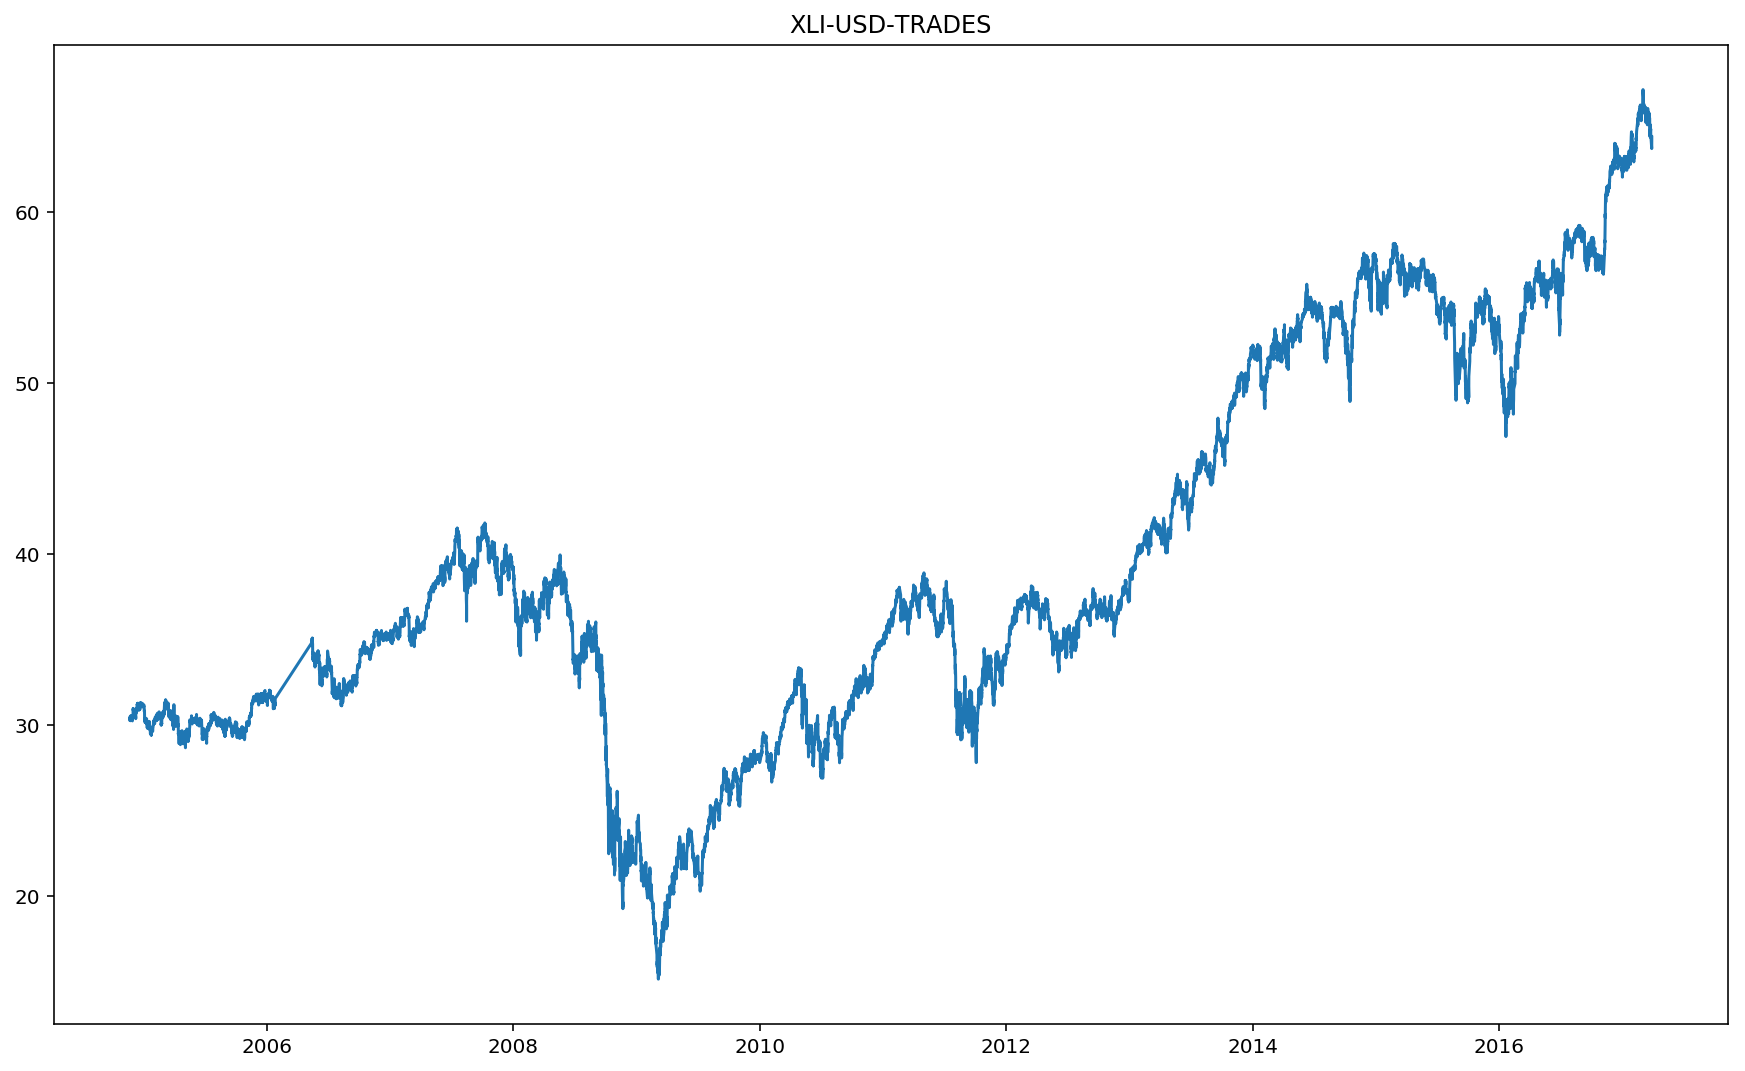

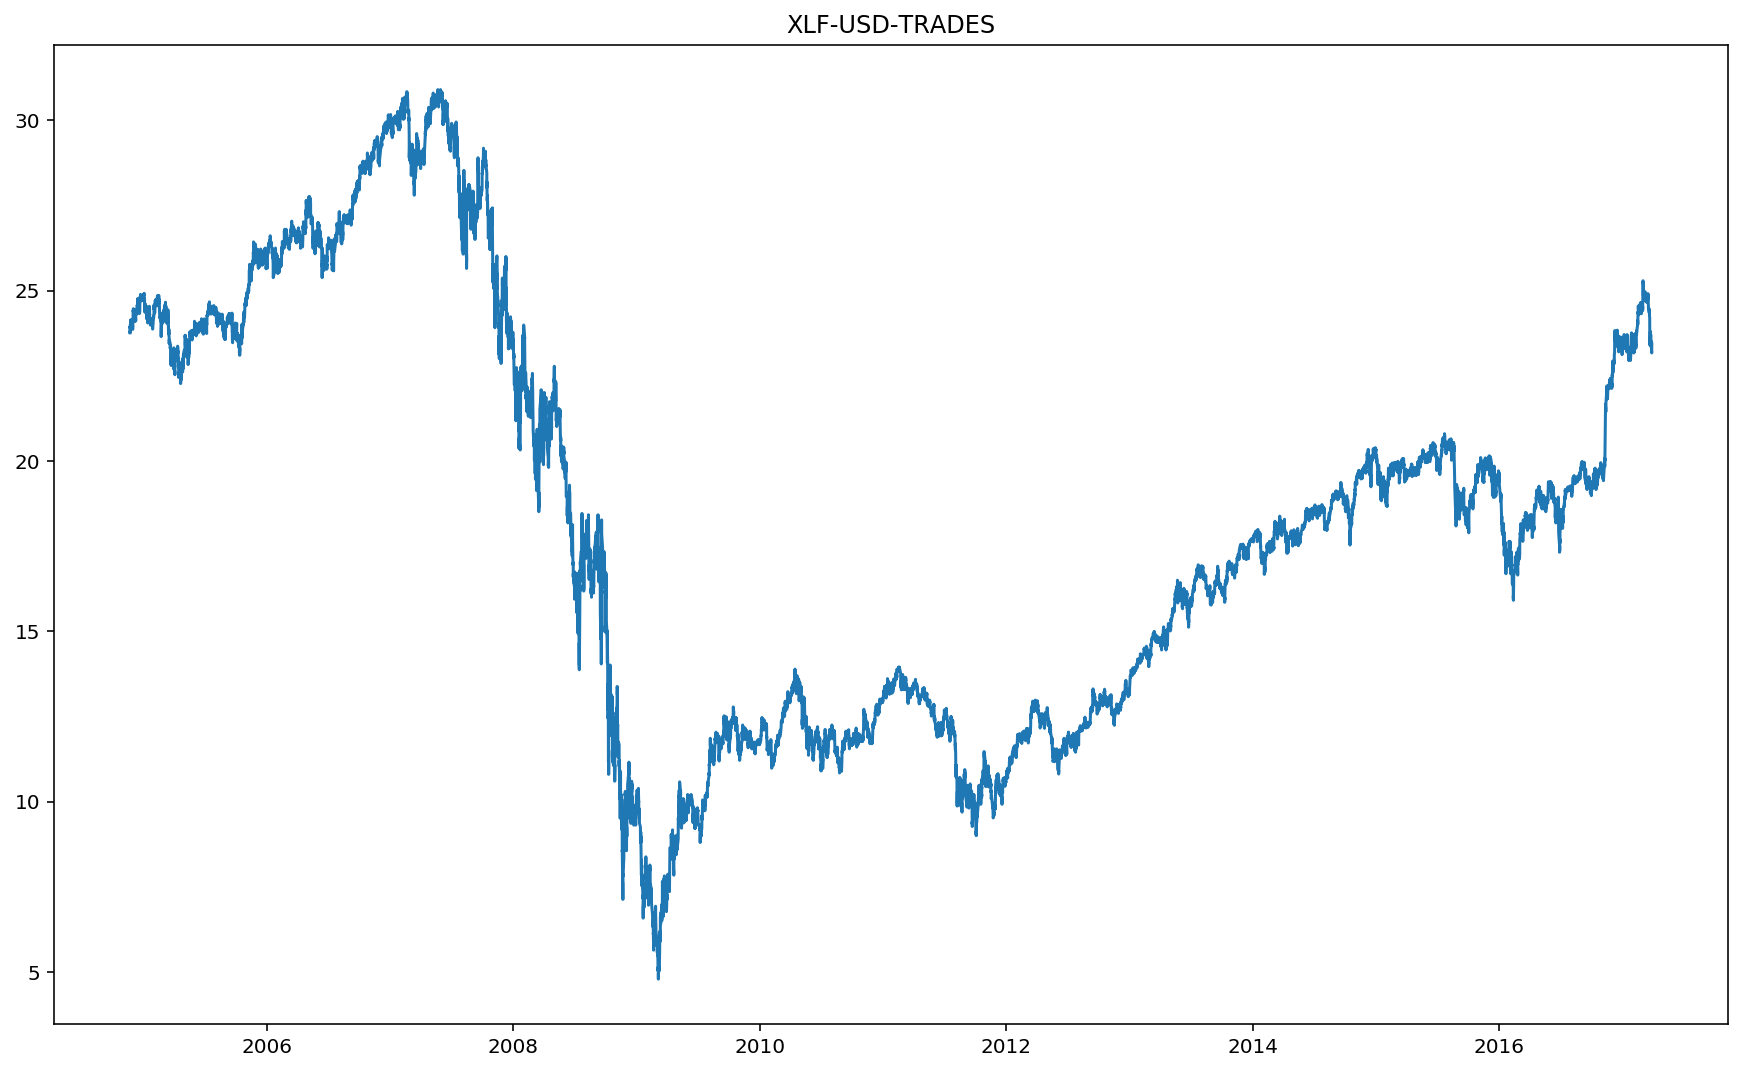

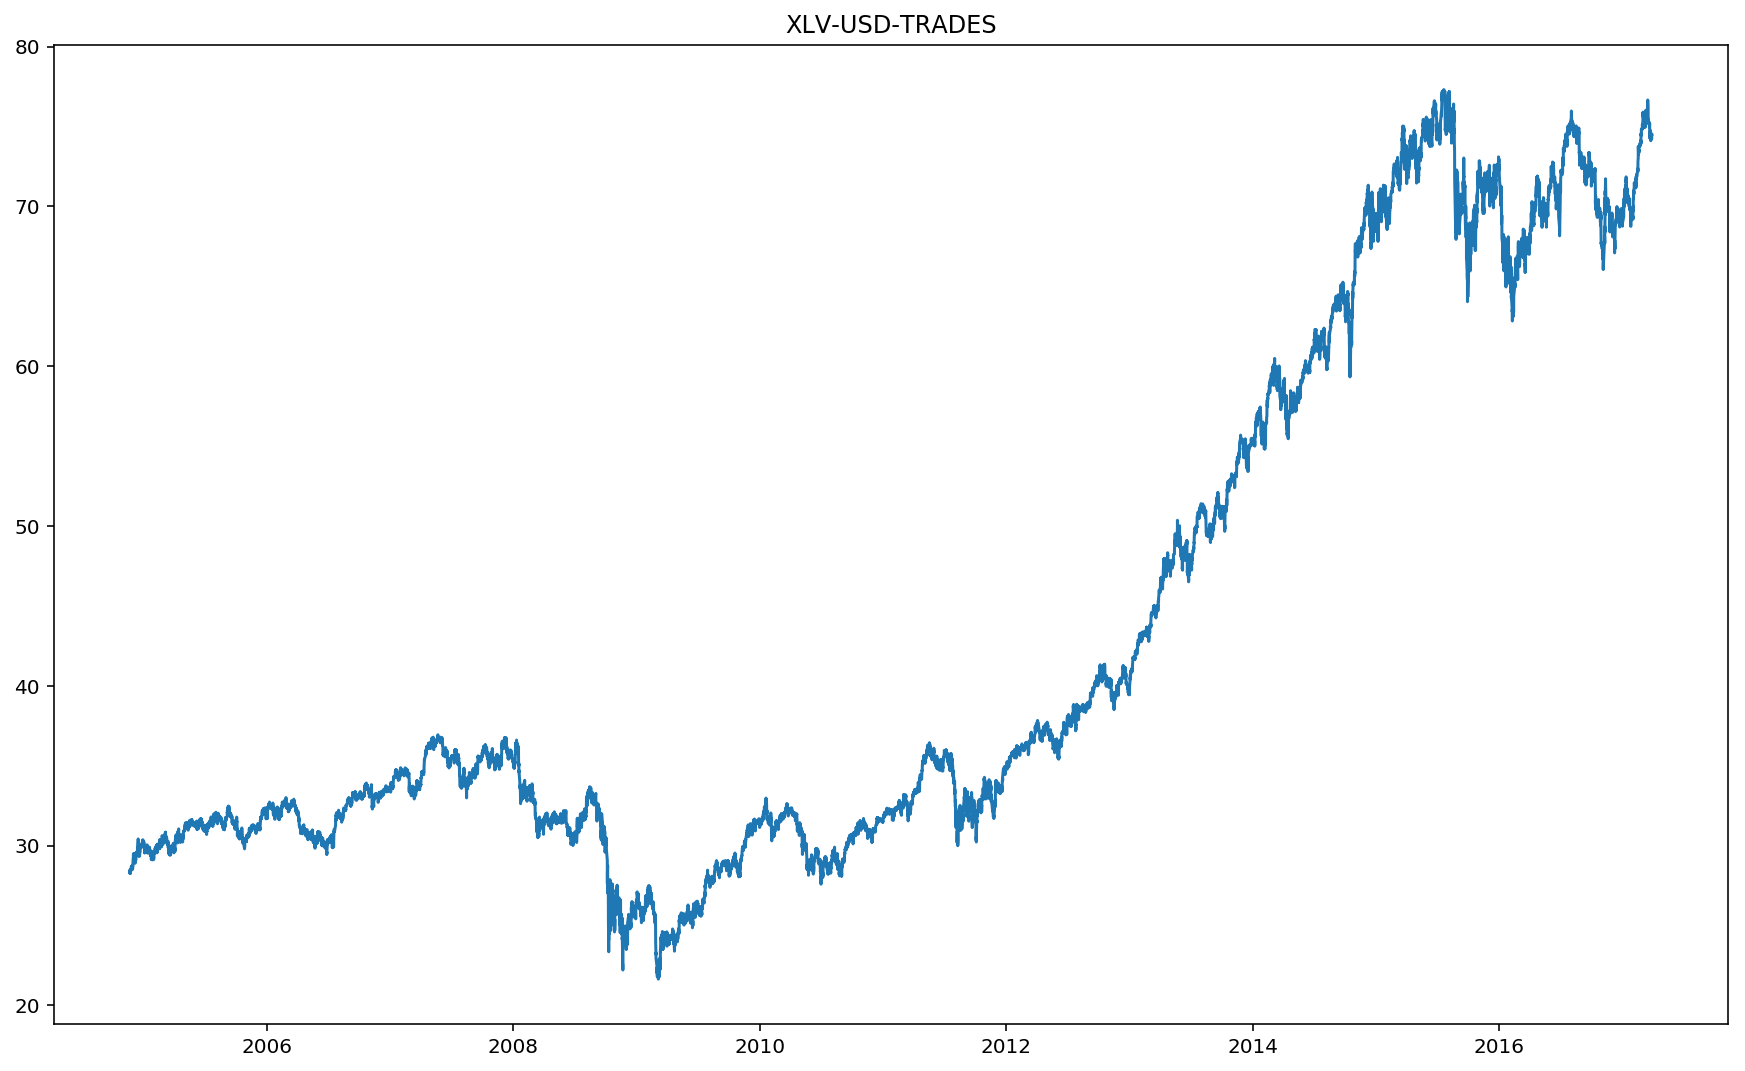

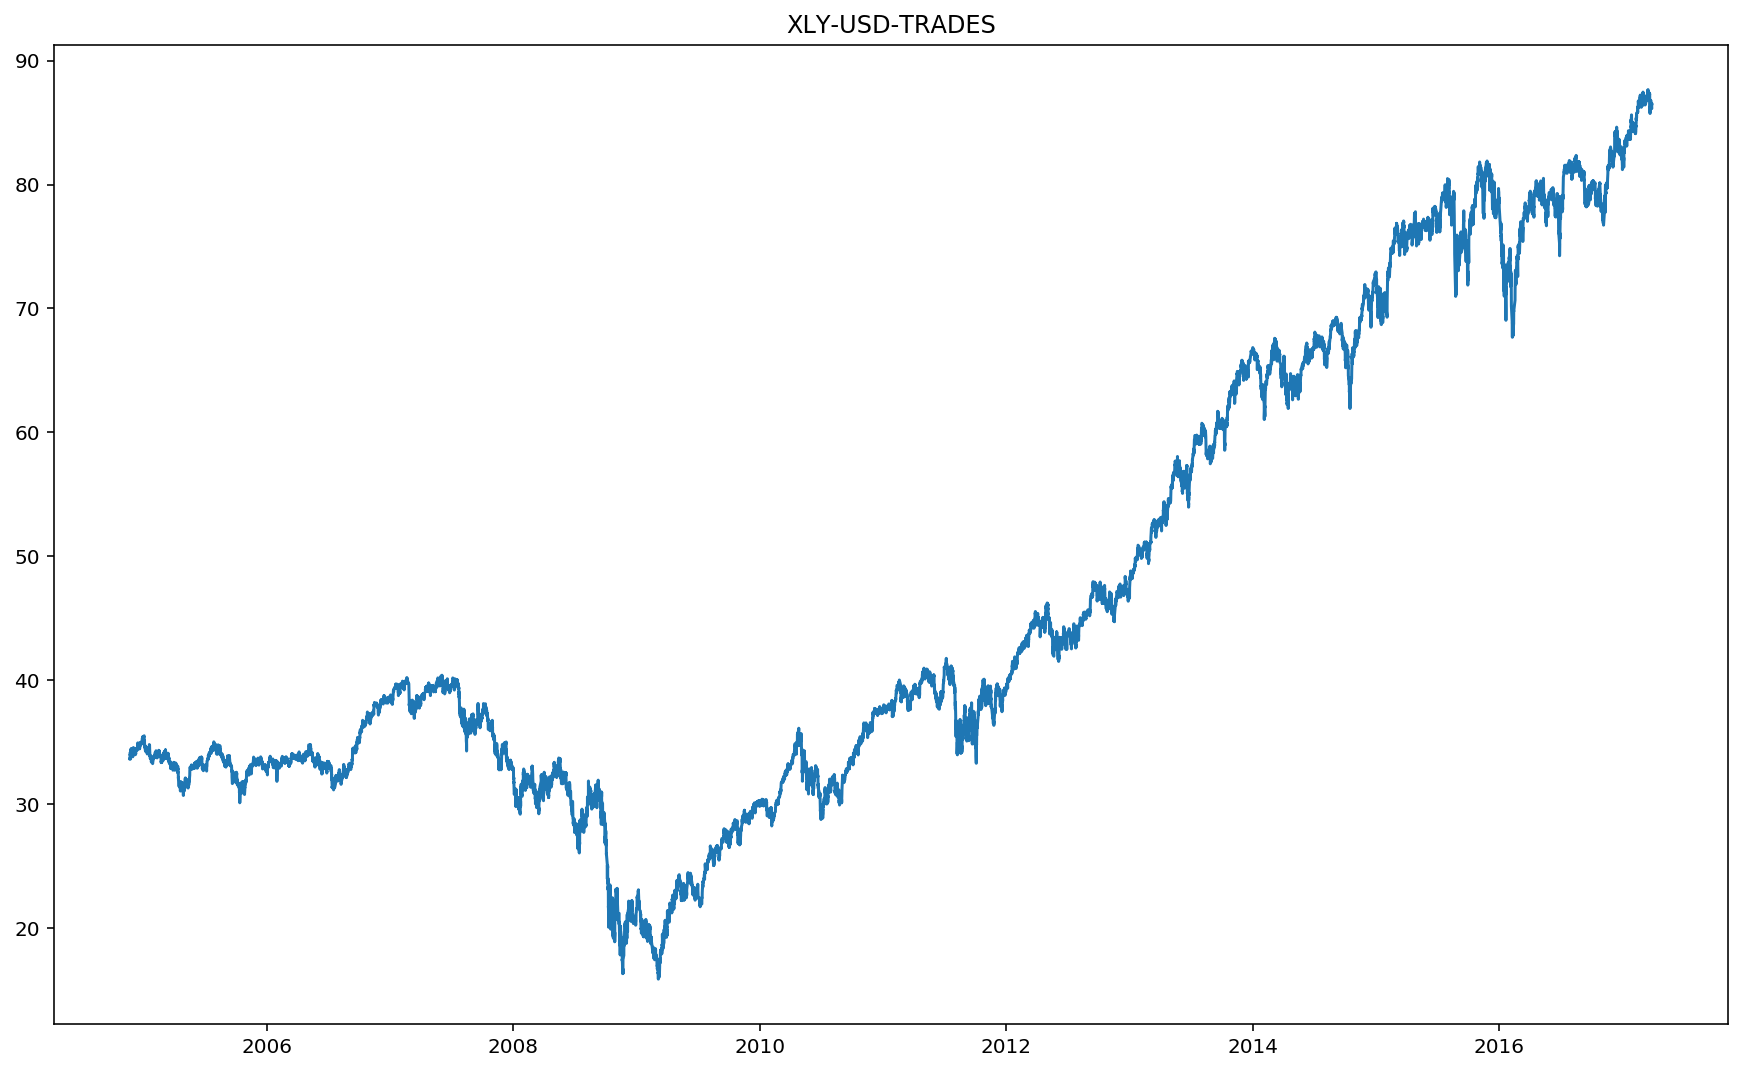

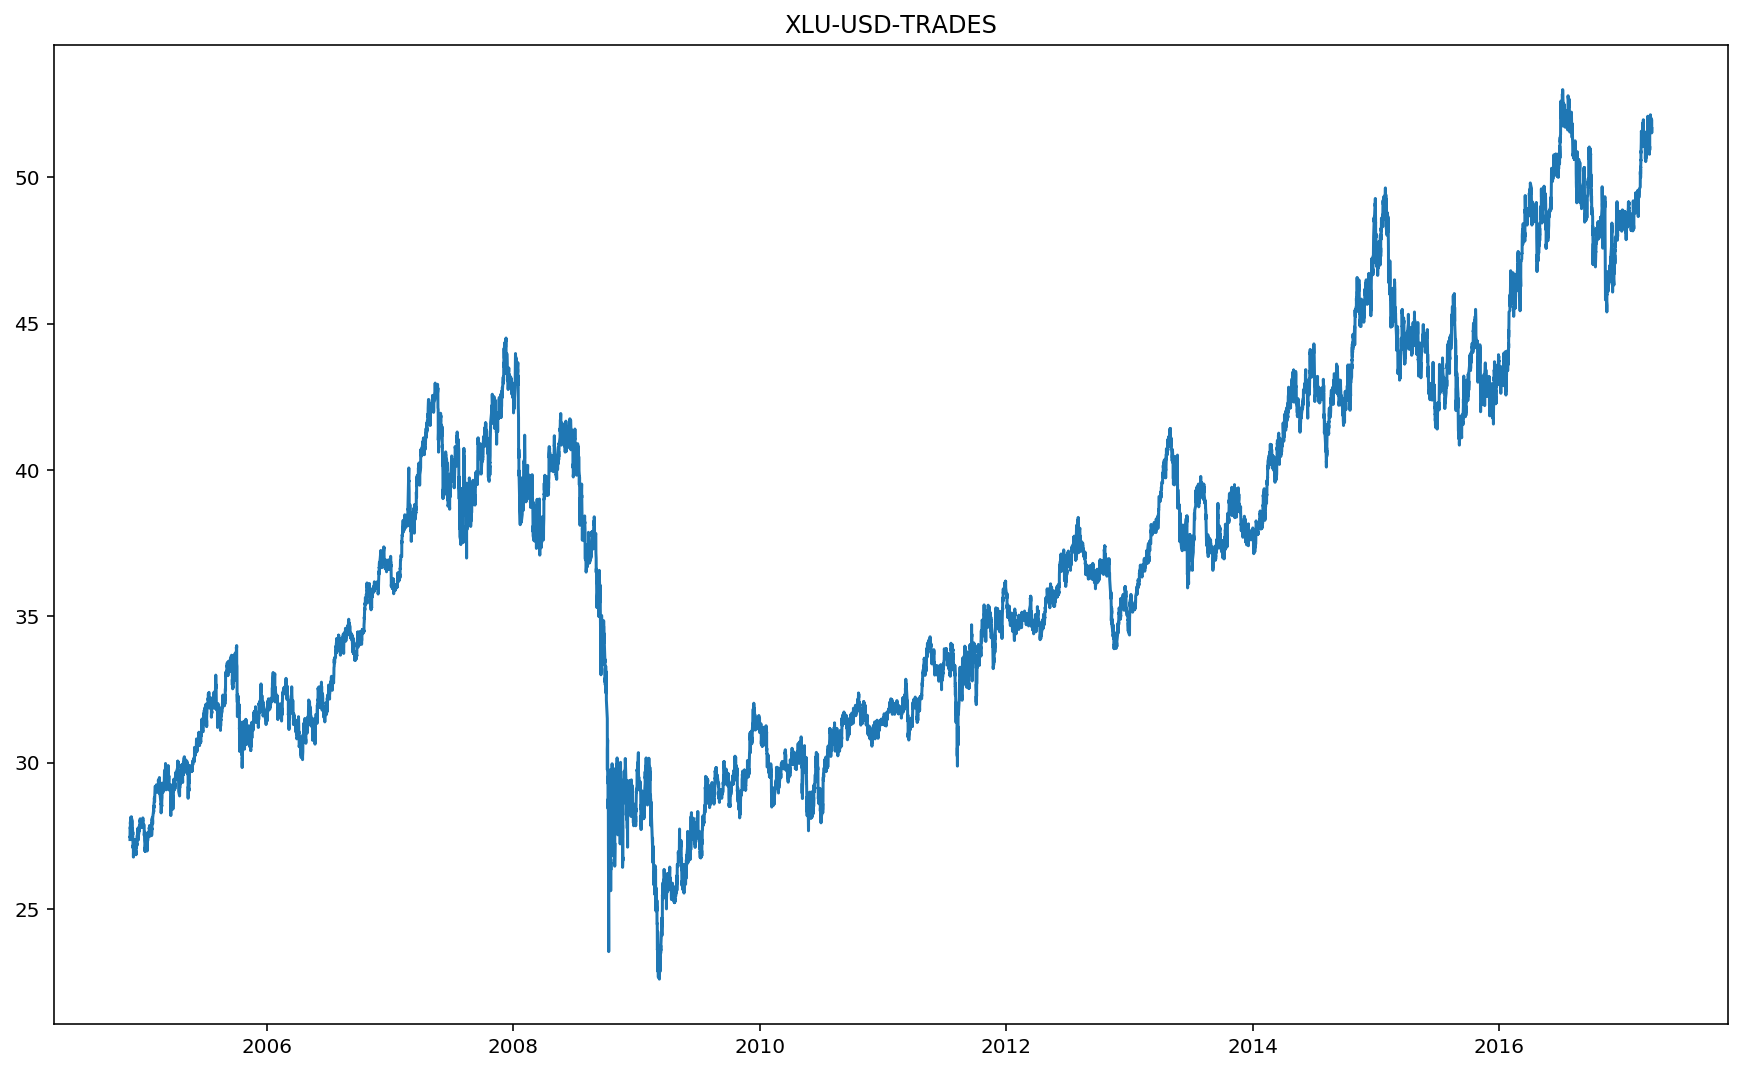

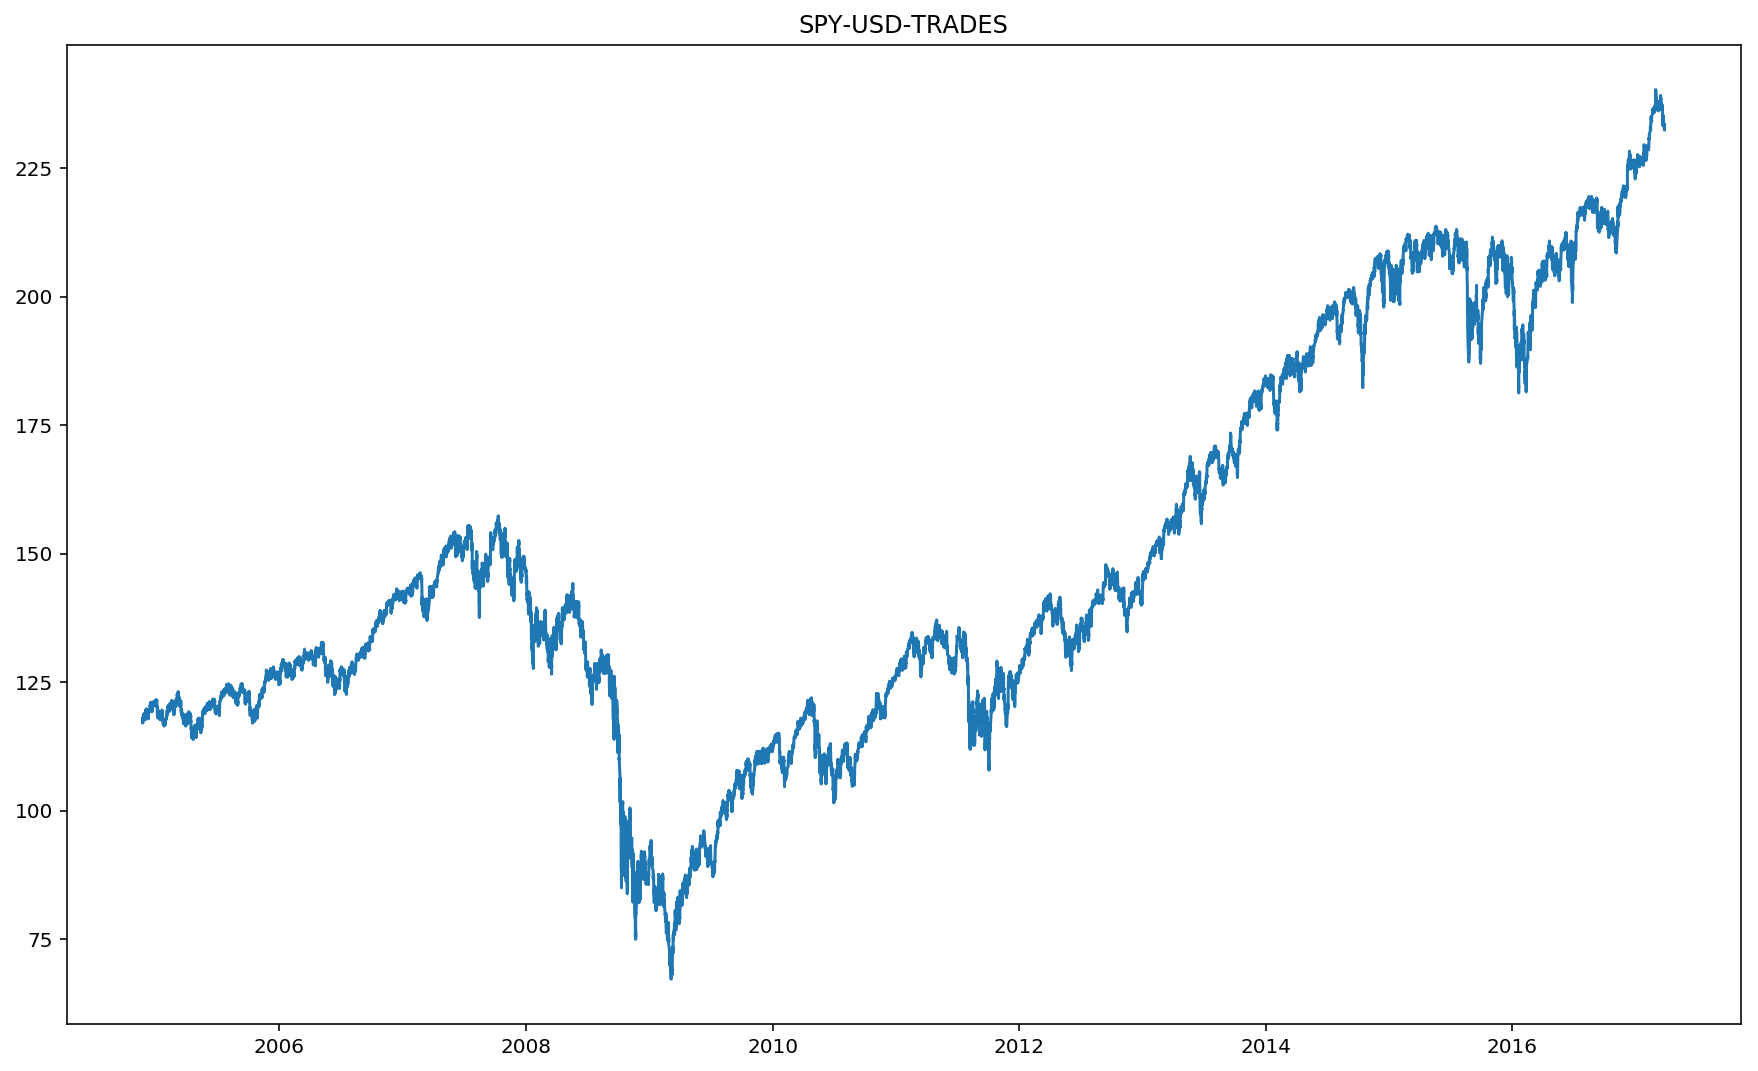

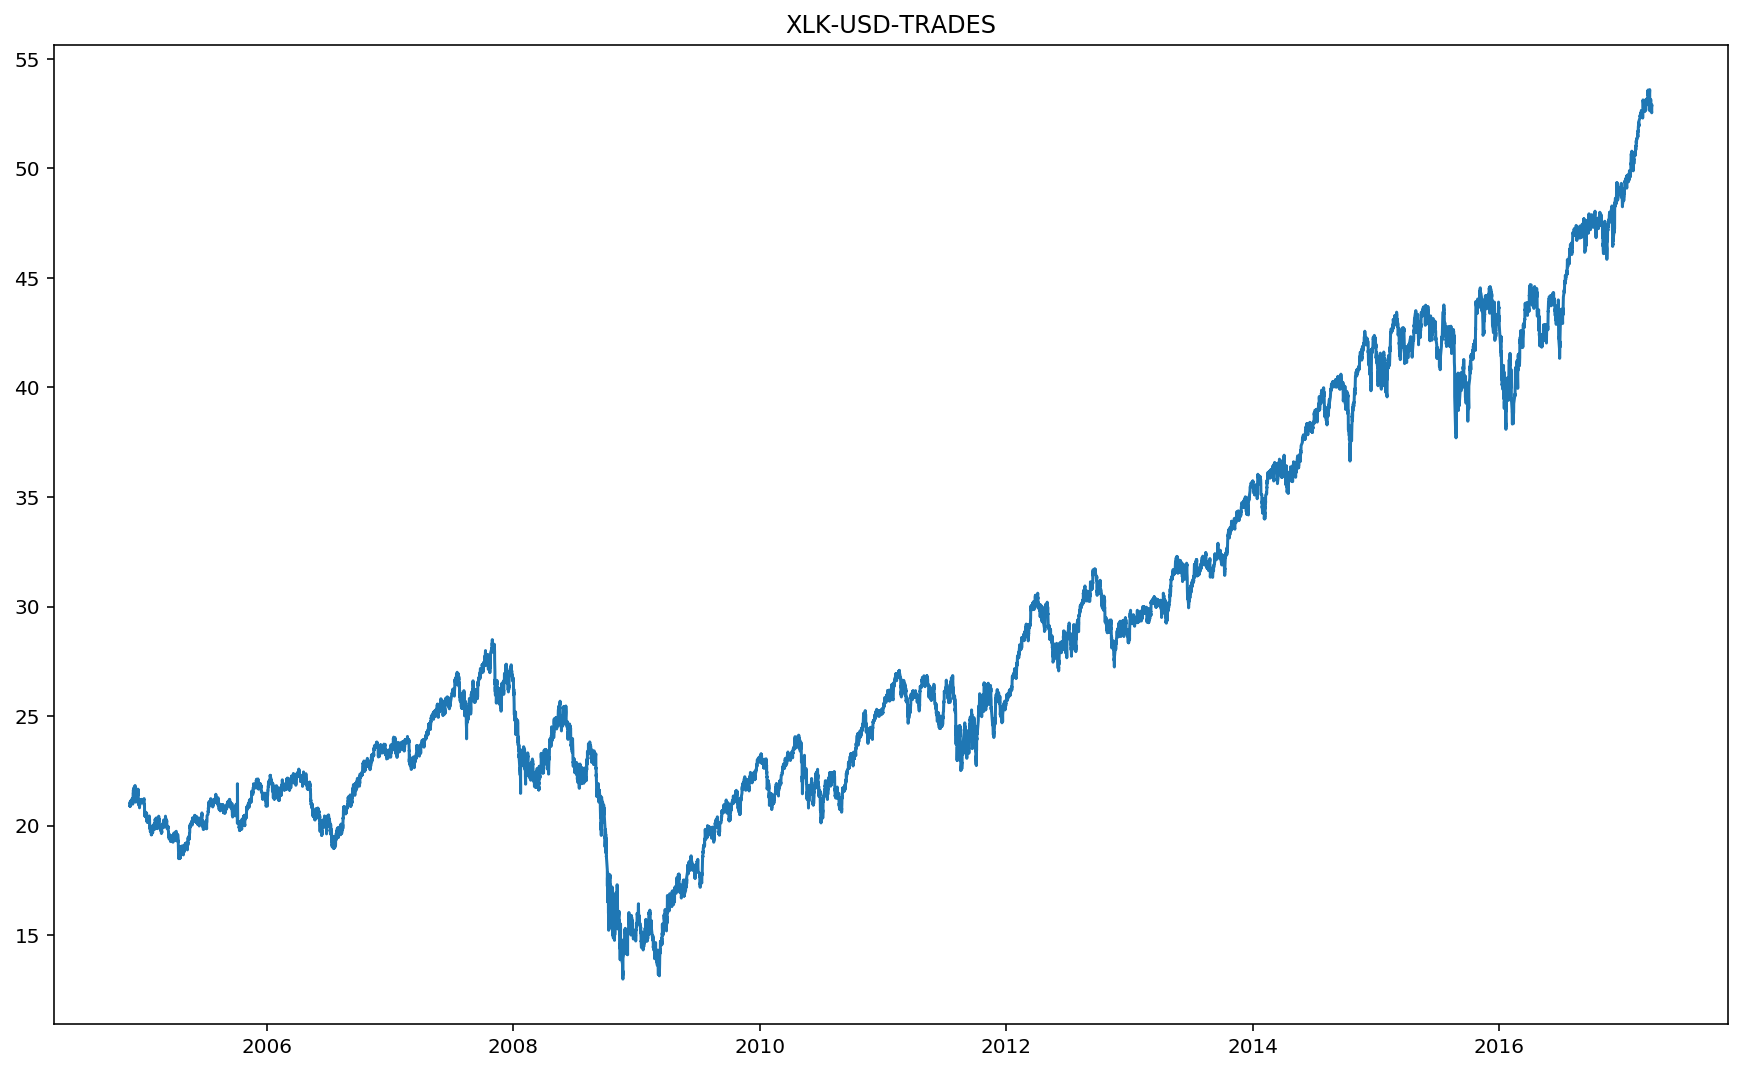

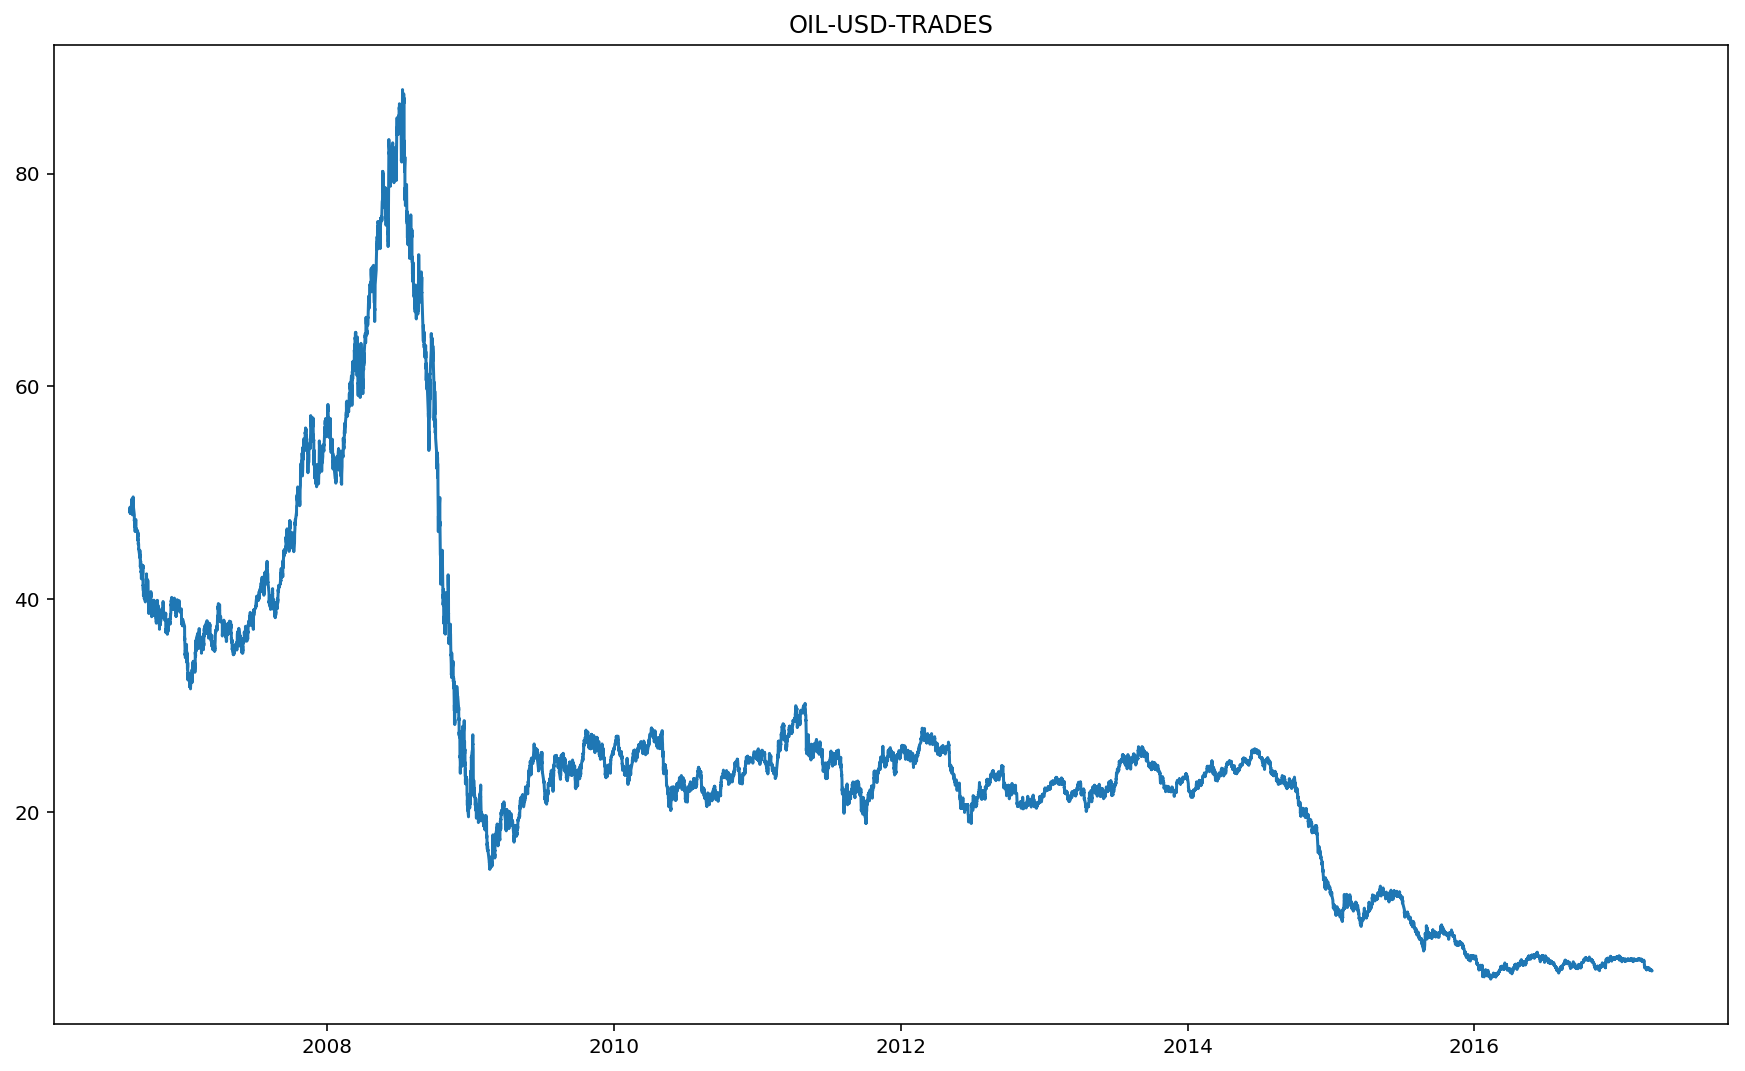

In [133]:
for key in prices.keys():
    if len(key) > 8:
        plt.plot(prices[key].index, prices[key]['close'])
        plt.title(key)
        plt.show()

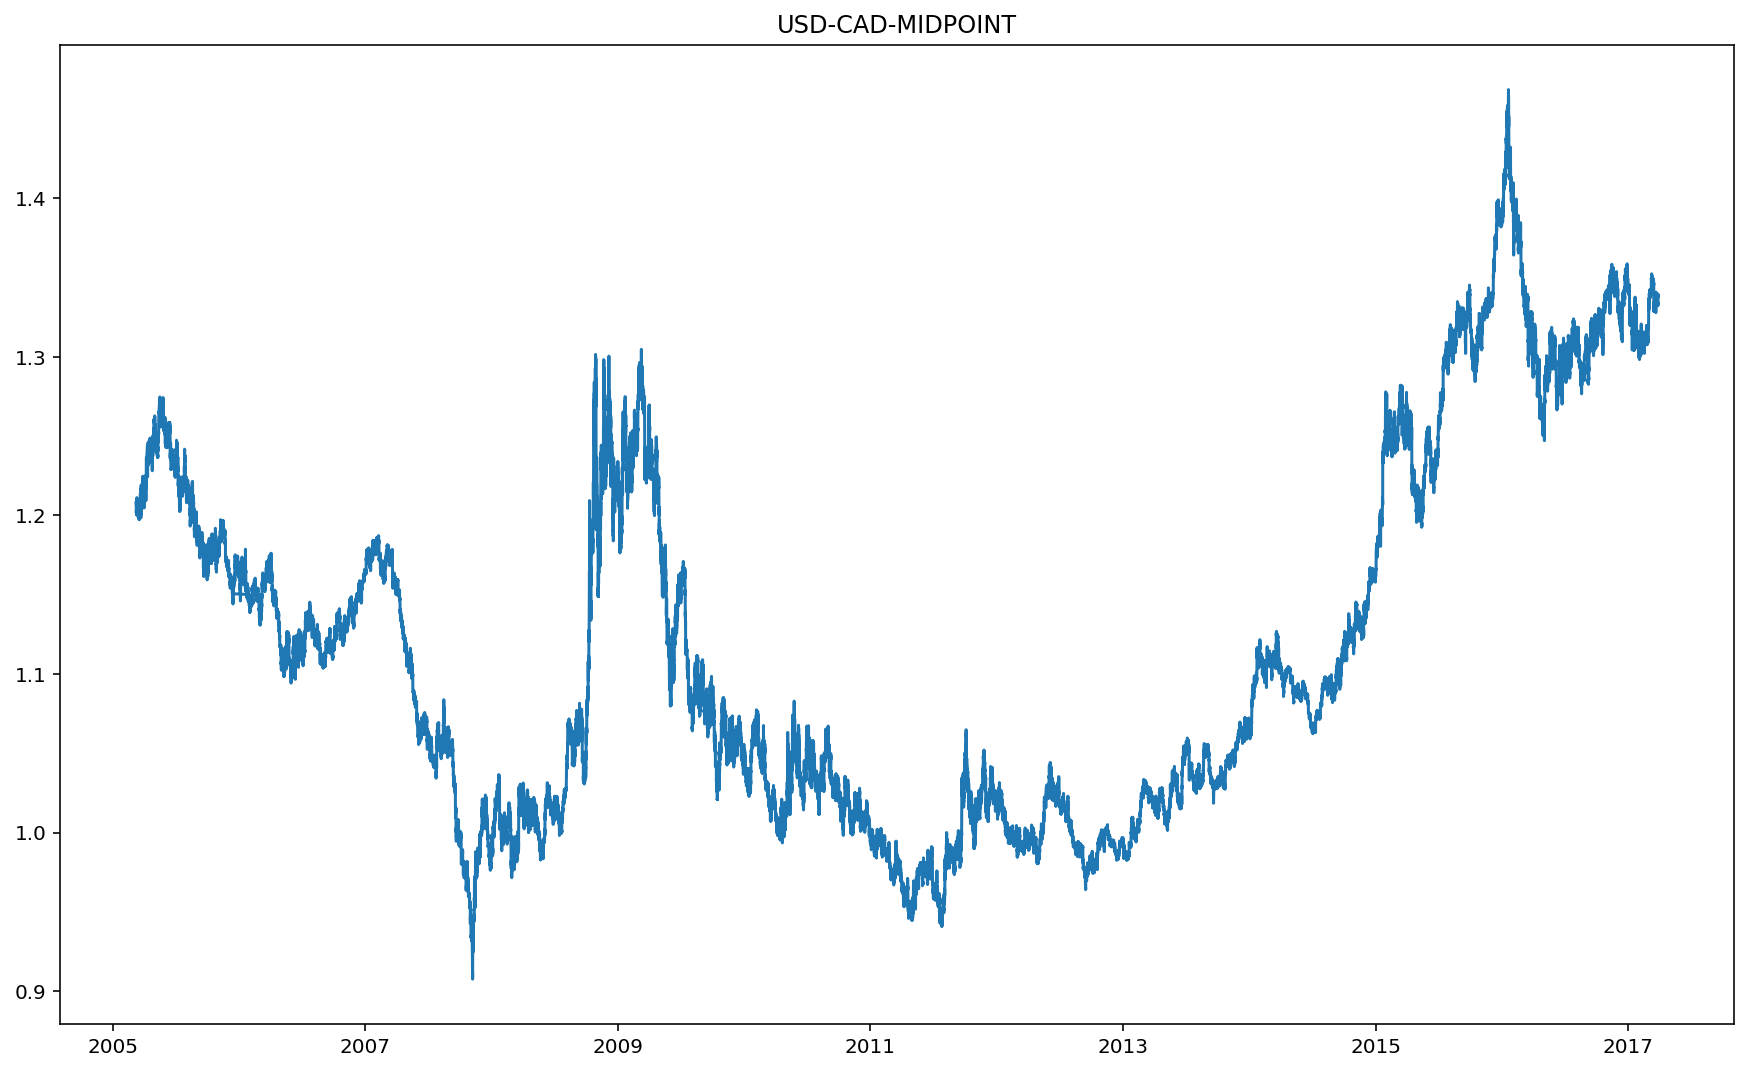

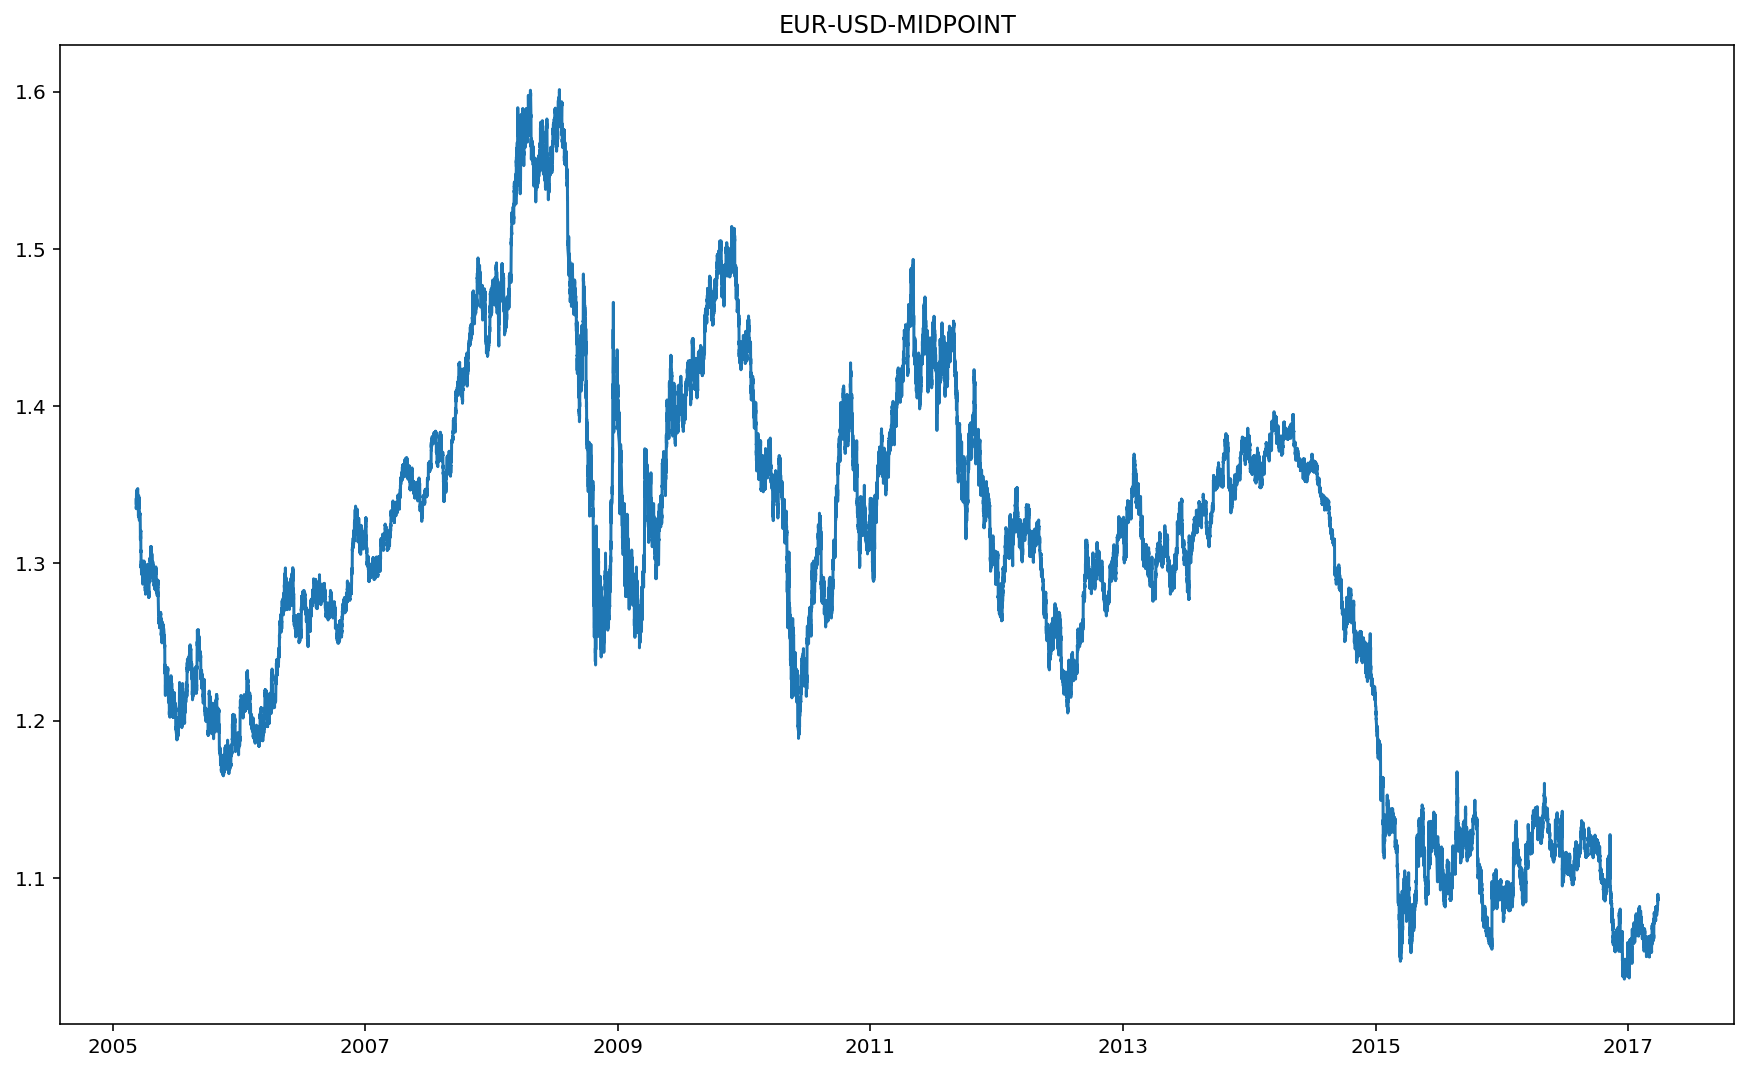

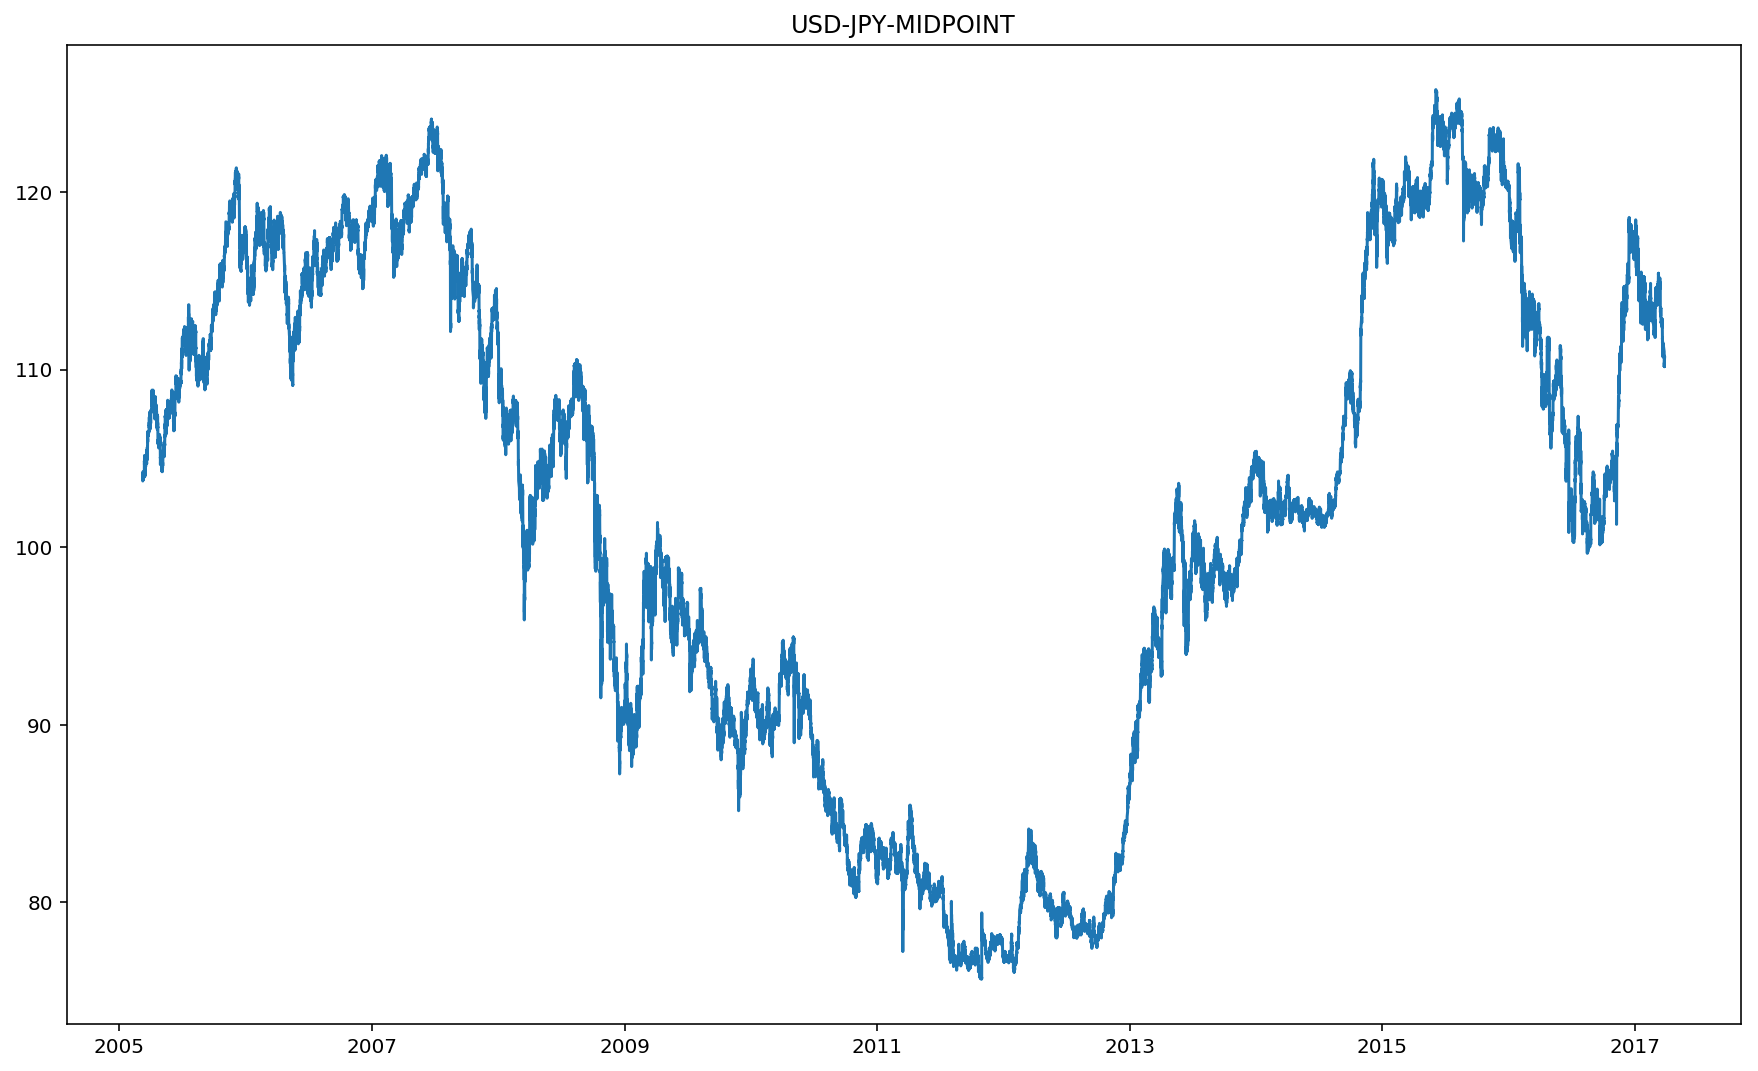

In [134]:
for key in prices.keys():
    if key[:3] in ['USD','EUR']:
        plt.plot(prices[key].index, prices[key]['close'])
        plt.title(key)
        plt.show()

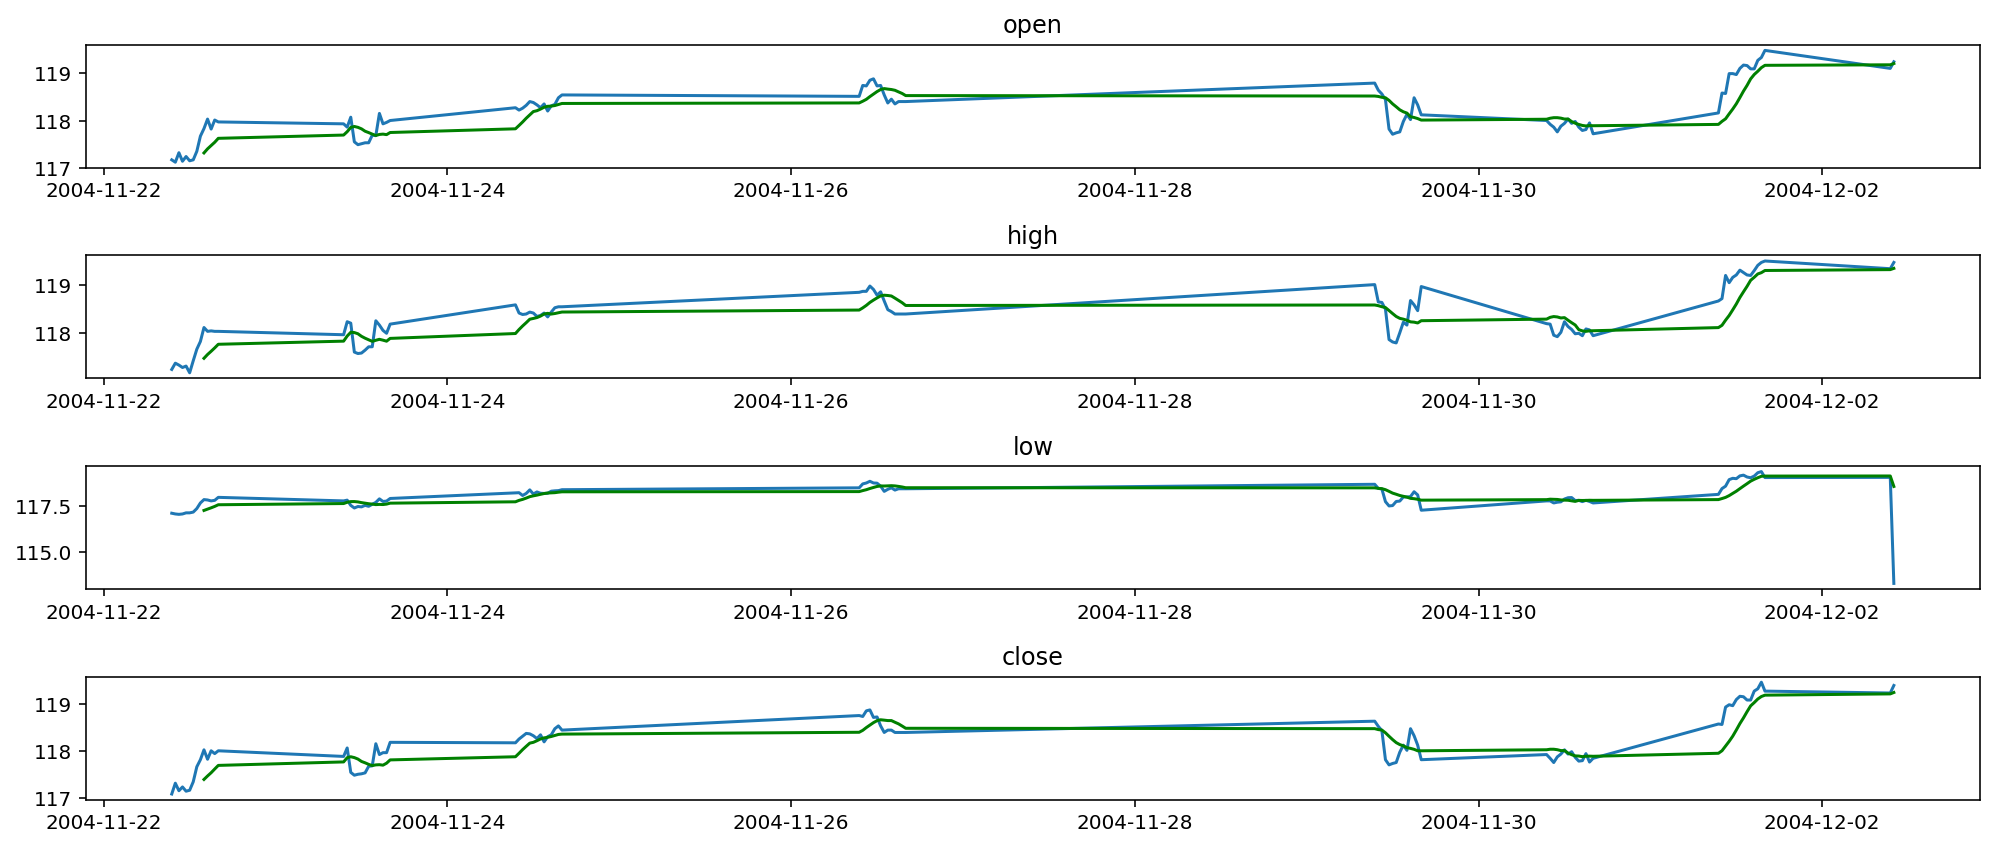

In [135]:
fig, axs = plt.subplots(4, figsize=(14, 6))
plot_moving_average_trend(axs[0], 'open', prices['SPY-USD-TRADES']['open'][:100], window=10)
plot_moving_average_trend(axs[1], 'high', prices['SPY-USD-TRADES']['high'][:100], window=10)
plot_moving_average_trend(axs[2], 'low', prices['SPY-USD-TRADES']['low'][:100], window=10)
plot_moving_average_trend(axs[3], 'close', prices['SPY-USD-TRADES']['close'][:100], window=10)
plt.tight_layout()

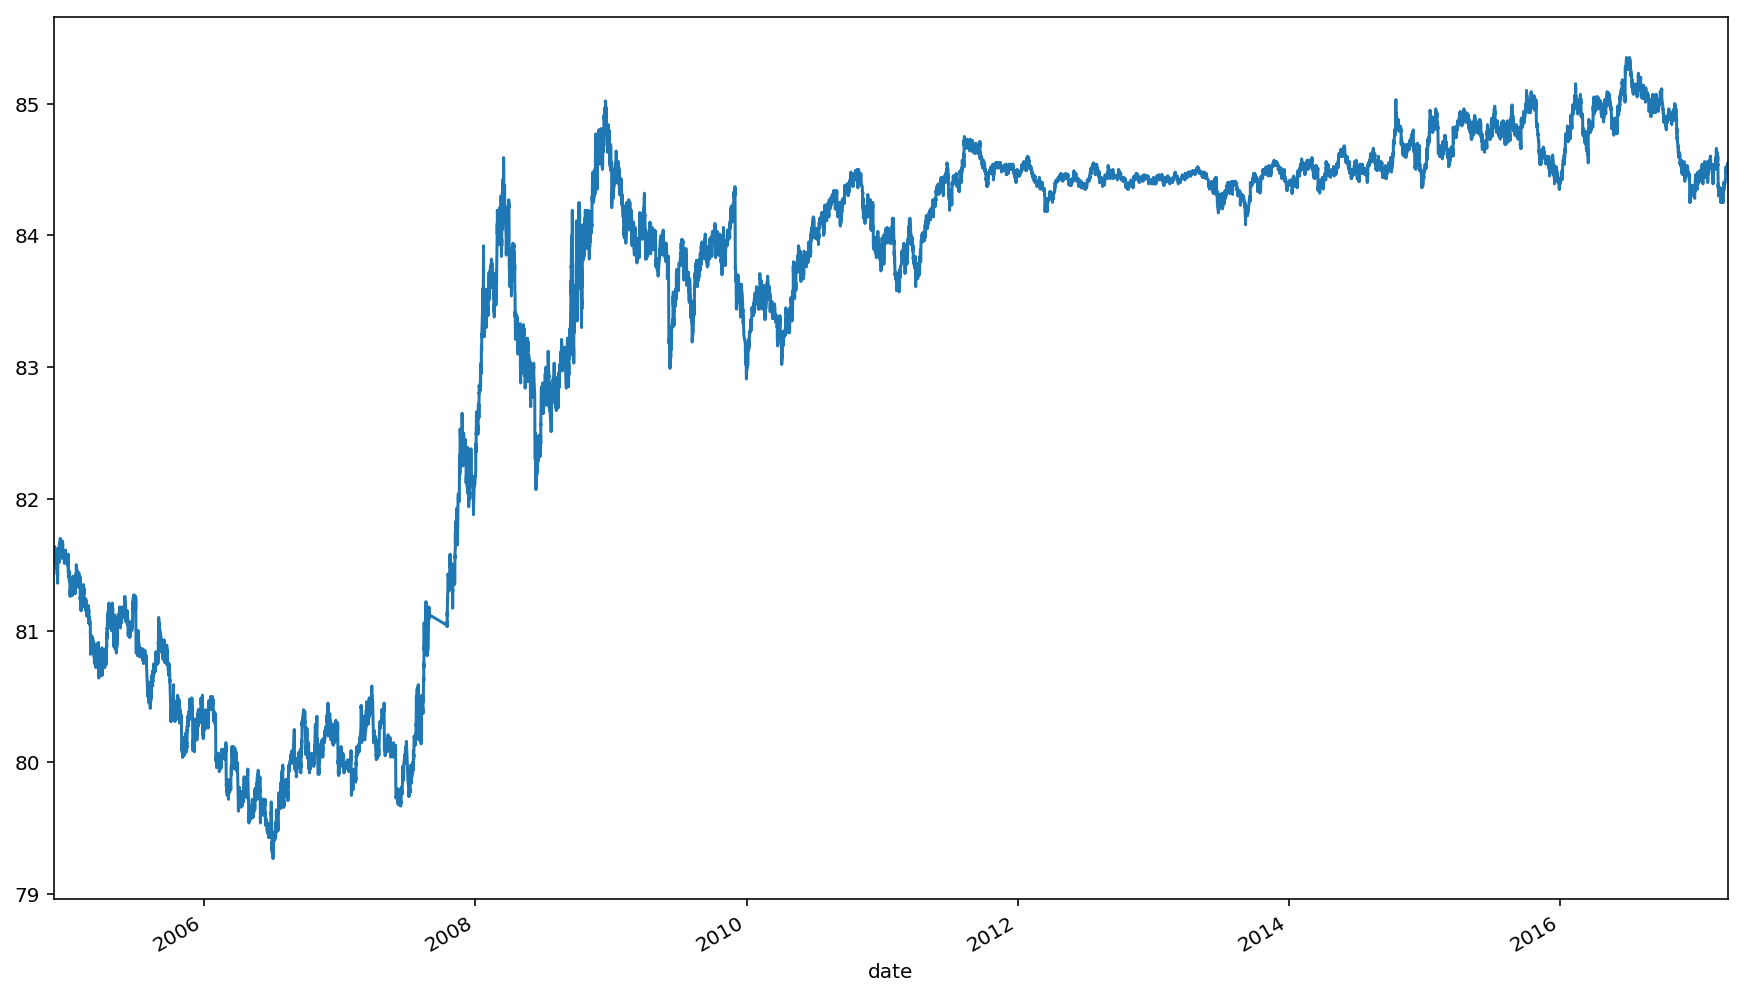

In [39]:
prices['SHY-USD-TRADES']['close'].plot()

### Looks like data is pretty clean now.  Lets gather the y variables

In [40]:
pre_post_FOMC_time_selector = []
for date in minutes_df.index:
    pre_post_FOMC_time_selector.extend(pd.date_range(date.replace(hour=13, minute=30), periods=2, freq='2 H'))

In [41]:
prices_FOMC = dict()
for key in prices.keys():
    prices_FOMC[key] = prices[key].loc[pre_post_FOMC_time_selector][['close-MA-4']].dropna()

In [42]:
prices_FOMC['SHY-USD-TRADES'].head()

,close-MA-4
date,
2004-12-14 13:30:00,81.5550
2004-12-14 15:30:00,81.6075
2005-02-02 13:30:00,81.2425
2005-02-02 15:30:00,81.2300
2005-03-22 13:30:00,80.8850


In [43]:
this_df = prices_FOMC['SHY-USD-TRADES']

In [44]:
this_df.head()

,close-MA-4
date,
2004-12-14 13:30:00,81.5550
2004-12-14 15:30:00,81.6075
2005-02-02 13:30:00,81.2425
2005-02-02 15:30:00,81.2300
2005-03-22 13:30:00,80.8850


In [54]:
y = this_df.groupby(this_df.index.date).diff().dropna()

In [60]:
sum(y > 0)

close-MA-4    62
dtype: int64

In [61]:
sum(y < 0)

close-MA-4    39
dtype: int64

### We seem to have a pretty balanced number of up days and down days.  

Now lets convert everything to target variables 

In [111]:
y_dfs = dict()
for key in prices_FOMC:
    y_dfs[key] = prices_FOMC[key].groupby(prices_FOMC[key].index.date).diff().dropna() 
    y_dfs[key]['fomc-close-MA-4-pct'] = y_dfs[key]['close-MA-4'] / prices[key].loc[y_dfs[key].index]['close']
    y_dfs[key].index = y_dfs[key].index.normalize()

In [112]:
y_dfs['SPY-USD-TRADES']

,close-MA-4,fomc-close-MA-4-pct
date,,
2004-12-14,0.2875,0.002380
2005-02-02,0.1250,0.001047
2005-03-22,-0.9775,-0.008345
2005-05-03,0.0300,0.000258
2005-06-30,-0.5025,-0.004221
2005-08-09,0.0325,0.000263
2005-09-20,-0.8675,-0.007105
2005-11-01,0.0325,0.000270
2005-12-13,0.6850,0.005386


### Time to TF-IDF!!!
Lets build the X matrix first

In [164]:
tfidf_vectorizer = TfidfVectorizer(min_df=1, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(minutes_df['statements'].values.tolist())

In [166]:
tfidf_vectorizer.vocabulary_

{u'limited': 872,
 u'consider': 326,
 u'pointing': 1071,
 u'dynamic': 484,
 u'month': 952,
 u'facilities': 604,
 u'faqs': 613,
 u'decisions': 411,
 u'jerome': 812,
 u'reluctant': 1234,
 u'number': 990,
 u'chain': 265,
 u'eligible': 508,
 u'segments': 1319,
 u'edward': 499,
 u'voted': 1575,
 u'updated': 1557,
 u'esther': 544,
 u'risk': 1288,
 u'far': 614,
 u'dollar': 467,
 u'rise': 1285,
 u'misunderstanding': 935,
 u'parry': 1029,
 u'frederic': 662,
 u'jack': 804,
 u'softened': 1372,
 u'fall': 610,
 u'affect': 116,
 u'existing': 573,
 u'bringing': 236,
 u'dampen': 393,
 u'accompanying': 87,
 u'stimulus': 1420,
 u'louis': 886,
 u'prolonged': 1134,
 u'damped': 392,
 u'large': 848,
 u'adjust': 105,
 u'intensification': 794,
 u'announced': 139,
 u'small': 1367,
 u'enhance': 525,
 u'20th': 44,
 u'ahead': 124,
 u'bernanke': 218,
 u'broader': 241,
 u'consistent': 333,
 u'nearing': 967,
 u'past': 1035,
 u'surrounding': 1460,
 u'likely': 870,
 u'street': 1426,
 u'design': 429,
 u'275': 52,
 u'su

In [146]:
tfidf_matrix.todense()

matrix([[ 0.06428243,  0.06428243,  0.12856487,  0.06428243,  0.06428243,
          0.06428243,  0.06428243,  0.06428243,  0.06428243,  0.06428243,
          0.06428243,  0.06428243,  0.06428243,  0.12856487,  0.1928473 ,
          0.06428243,  0.12856487,  0.06428243,  0.06428243,  0.06428243,
          0.06428243,  0.06428243,  0.06428243,  0.06428243,  0.06428243,
          0.06428243,  0.06428243,  0.06428243,  0.06428243,  0.12856487,
          0.06428243,  0.1928473 ,  0.12856487,  0.06428243,  0.12856487,
          0.06428243,  0.1928473 ,  0.06428243,  0.06428243,  0.06428243,
          0.06428243,  0.1928473 ,  0.06428243,  0.06428243,  0.06428243,
          0.06428243,  0.06428243,  0.06428243,  0.06428243,  0.06428243,
          0.12856487,  0.06428243,  0.06428243,  0.06428243,  0.06428243,
          0.06428243,  0.06428243,  0.06428243,  0.06428243,  0.06428243,
          0.12856487,  0.57854191,  0.12856487,  0.38569461,  0.06428243,
          0.06428243,  0.06428243,  0.

In [149]:
tfidf_matrix.shape

(1, 68)

In [162]:
minutes_list = minutes_df['statements'].values.tolist()

In [163]:
minutes_list[0]

u"Chairman Alan Greenspan announced today that the Federal Open Market Committee decided to increase slightly the degree of pressure on reserve positions. The action is expected to be associated with a small increase in short-term money market interest rates.\n\nThe decision was taken to move toward a less accommodative stance in monetary policy in order to sustain and enhance the economic expansion.\n\nChairman Greenspan decided to announce this action immediately so as to avoid any misunderstanding of the Committee's purposes, given the fact that this is the first firming of reserve market conditions by the Committee since early 1989."

In [168]:
minutes_df.iloc[0]

statements    Chairman Alan Greenspan announced today that t...
Name: 1994-02-04 00:00:00, dtype: object